In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install scikeras

In [3]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
from google.colab import files
uploaded = files.upload()

Saving FINAL Animal Data 2022.csv to FINAL Animal Data 2022.csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(uploaded["FINAL Animal Data 2022.csv"]))

In [8]:
#drop unnecessary columns
data.drop(["SubjectID","Run"],axis=1,inplace=True)
oversample = SMOTE()

<BarContainer object of 3 artists>

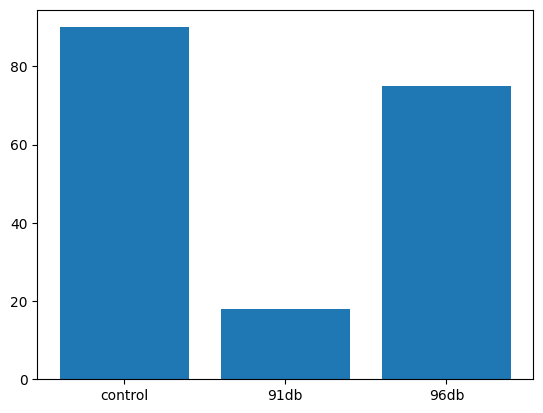

In [9]:
#plot class distributions
groups = ['control','91db','96db']
group_len  = [len(data[(data["Group"]=="control")]),len(data[(data["Group"]=="91db")]),len(data[(data["Group"]=="96db")])]
plt.bar(x= groups,height = group_len)

<BarContainer object of 9 artists>

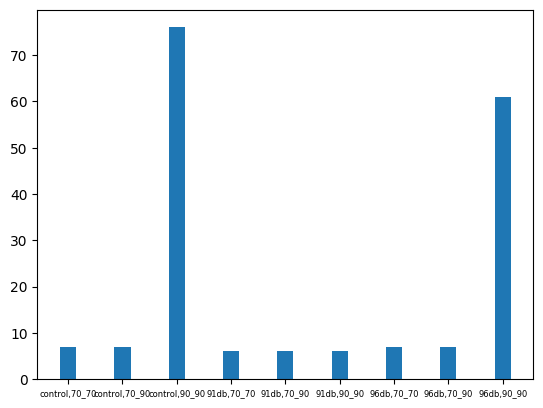

In [10]:
#plot class distributions
groups = ['control,70_70','control,70_90','control,90_90','91db,70_70','91db,70_90','91db,90_90','96db,70_70','96db,70_90','96db,90_90']
group_len  = [len(data[(data["Group"]=="control") & (data["Levels"]=="70_70")]),len(data[(data["Group"]=="control") & (data["Levels"]=="70_90")]),len(data[(data["Group"]=="control") & (data["Levels"]=="90_90")]),len(data[(data["Group"]=="91db") & (data["Levels"]=="70_70")]),len(data[(data["Group"]=="91db") & (data["Levels"]=="70_90")]),len(data[(data["Group"]=="91db") & (data["Levels"]=="90_90")]),
             len(data[(data["Group"]=="96db") & (data["Levels"]=="70_70")]),len(data[(data["Group"]=="96db") & (data["Levels"]=="70_90")]),len(data[(data["Group"]=="96db") & (data["Levels"]=="90_90")])]
plt.xticks(fontsize = 6)
plt.bar(x= groups,height = group_len,width = 0.3)

In [11]:
#find rows with missing values
data[data.isnull().any(axis=1)]

Group Levels  A_C1W1T0  A_C2W1T0  L_C1W1T0   L_C2W1T0  A_C1W2T0  \
1    control  70_90  0.000002  0.000005  1.311475  11.188525  0.000005   
18   control  70_70  0.000005  0.000005  1.352459  11.270492  0.000006   
44      96db  90_90  0.000007  0.000007  1.229508  11.147541  0.000012   
53      96db  90_90  0.000004  0.000004  1.188525  11.106557  0.000012   
63   control  90_90  0.000005  0.000003  1.393443  11.352459  0.000006   
..       ...    ...       ...       ...       ...        ...       ...   
178     96db  90_90  0.000004  0.000004  1.311475  11.147541  0.000005   
179     96db  90_90  0.000005  0.000004  1.311475  11.147541  0.000006   
180     96db  90_90  0.000006  0.000003  1.393443  11.311475  0.000007   
181     96db  90_90  0.000007  0.000003  1.352459  11.311475  0.000007   
182     96db  90_90  0.000007  0.000004  1.352459  11.229508  0.000006   

     A_C2W2T0  L_C1W2T0   L_C2W2T0  ...  rC_C2W2T2  lC_C2W3T2  cC_C2W3T2  \
1    0.000008  2.008197  11.885246  ...   0.000430   0.000320   0.000375   
18   0.000007  2.172131  12.049180  ...   0.000149   0.000155   0.000216   
44   0.000011  1.967213  11.885246  ...   0.000329   0.000113   0.000242   
53   0.000013  1.967213  11.885246  ...   0.000248   0.000138   0.000200   
63   0.000007  1.885246  11.803279  ...   0.000061   0.000224   0.000381   
..        ...       ...        ...  ...        ...        ...        ...   
178  0.000004  1.967213  11.844262  ...   0.000092   0.000081   0.000144   
179  0.000004  1.967213  11.844262  ...   0.000089   0.000084   0.000141   
180  0.000007  1.844262  11.762295  ...   0.000154   0.000108   0.000190   
181  0.000006  1.844262  11.762295  ...   0.000147   0.000095   0.000182   
182  0.000005  1.844262  11.762295  ...   0.000150   0.000093   0.000178   

     rC_C2W3T2     lC_C2W4T2  cC_C2W4T2  rC_C2W4T2  lC_C2W5T2  cC_C2W5T2  \
1     0.000228  9.020000e-05   0.000122   0.000080   0.000059   0.000041   
18    0.000102  2.930000e-05   0.000049   0.000039   0.000048   0.000036   
44    0.000221  3.340000e-05   0.000035   0.000044   0.000032   0.000028   
53    0.000193           NaN        NaN        NaN   0.000051   0.000059   
63    0.000227  5.240000e-05   0.000073   0.000055   0.000021   0.000028   
..         ...           ...        ...        ...        ...        ...   
178   0.000088  6.320000e-06   0.000017   0.000019   0.000012   0.000013   
179   0.000080  2.860000e-07   0.000007   0.000013   0.000013   0.000018   
180   0.000157  4.410000e-05   0.000040   0.000022   0.000027   0.000039   
181   0.000165  4.190000e-05   0.000035   0.000019   0.000028   0.000039   
182   0.000166  4.280000e-05   0.000035   0.000016   0.000015   0.000039   

     rC_C2W5T2  
1     0.000010  
18    0.000029  
44    0.000025  
53    0.000013  
63    0.000019  
..         ...  
178   0.000008  
179   0.000004  
180   0.000023  
181   0.000021  
182   0.000033  

[76 rows x 102 columns]

In [12]:
#order the variables with the most missing values
order = []
for i in data.columns[data.isna().any()]:
    order.append((data[i].isna().sum(),i))
order.sort(reverse=True)
print(order)

[(22, 'A_C2W5T2'), (21, 'A_C2W5T0'), (20, 'rC_C2W5T2'), (20, 'lC_C2W5T2'), (20, 'cC_C2W5T2'), (20, 'L_C2W5T2'), (15, 'A_C2W4T0'), (15, 'A_C1W5T2'), (13, 'rC_C2W5T0'), (13, 'lC_C2W5T0'), (13, 'cC_C2W5T0'), (12, 'L_C2W5T0'), (9, 'A_C1W2T2'), (8, 'rC_C1W5T2'), (8, 'lC_C1W5T2'), (8, 'cC_C1W5T2'), (8, 'L_C1W5T2'), (8, 'A_C1W5T0'), (7, 'A_C2W4T2'), (7, 'A_C1W4T2'), (4, 'A_C1W2T0'), (3, 'rC_C1W5T0'), (3, 'rC_C1W4T2'), (3, 'lC_C1W5T0'), (3, 'lC_C1W4T2'), (3, 'cC_C1W5T0'), (3, 'cC_C1W4T2'), (3, 'L_C1W5T0'), (3, 'L_C1W4T2'), (3, 'A_C2W3T0'), (3, 'A_C1W3T2'), (3, 'A_C1W1T2'), (2, 'A_C2W3T2'), (1, 'rC_C2W4T2'), (1, 'lC_C2W4T2'), (1, 'cC_C2W4T2'), (1, 'L_C2W4T2'), (1, 'A_C2W1T2')]


## impute for train and test separately. 


In [13]:
#imputting process using KNN
train, test = train_test_split(data, test_size=0.2, random_state=42)
data_add_train = pd.DataFrame(columns=data.columns)
data_add_test = pd.DataFrame(columns=data.columns)
for i in ["control","91db","96db"]:
    for j in ["70_70","70_90","90_90"]:
        group_data = train[(train["Group"]==i) & (train["Levels"]==j)].iloc[:,2:]
        imputer = KNNImputer(n_neighbors=6)
        temp = train[(train["Group"]==i) & (train["Levels"]==j)].iloc[:,:2]
        temp = temp.reset_index(drop=True)
        temp = pd.concat([temp,pd.DataFrame(imputer.fit_transform(group_data),columns = train.columns[2:])],axis=1)
        data_add_train = pd.concat([data_add_train,temp],axis=0)
        group_data = test[(test["Group"]==i) & (test["Levels"]==j)].iloc[:,2:]
        if(len(group_data)>0):
          imputer = KNNImputer(n_neighbors=6)
          temp = test[(test["Group"]==i) & (test["Levels"]==j)].iloc[:,:2]
          temp = temp.reset_index(drop=True)
          temp = pd.concat([temp,pd.DataFrame(imputer.fit_transform(group_data),columns = test.columns[2:])],axis=1)
          data_add_test = pd.concat([data_add_test,temp],axis=0)

<BarContainer object of 9 artists>

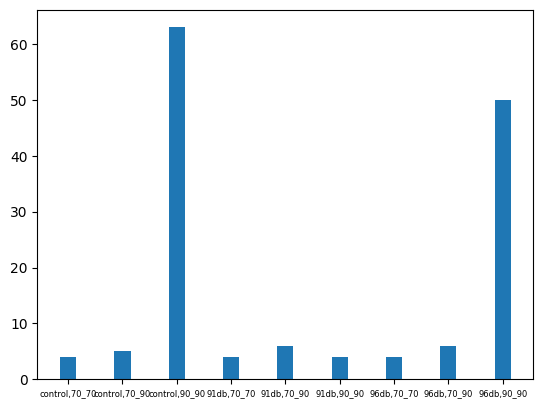

In [14]:
#plot class distributions for train dataset
groups = ['control,70_70','control,70_90','control,90_90','91db,70_70','91db,70_90','91db,90_90','96db,70_70','96db,70_90','96db,90_90']
group_len  = [len(train[(train["Group"]=="control") & (train["Levels"]=="70_70")]),len(train[(train["Group"]=="control") & (train["Levels"]=="70_90")]),len(train[(train["Group"]=="control") & (train["Levels"]=="90_90")]),len(train[(train["Group"]=="91db") & (train["Levels"]=="70_70")]),len(train[(train["Group"]=="91db") & (train["Levels"]=="70_90")]),len(train[(train["Group"]=="91db") & (train["Levels"]=="90_90")]),
             len(train[(train["Group"]=="96db") & (train["Levels"]=="70_70")]),len(train[(train["Group"]=="96db") & (train["Levels"]=="70_90")]),len(train[(train["Group"]=="96db") & (train["Levels"]=="90_90")])]
plt.xticks(fontsize = 6)
plt.bar(x= groups,height = group_len,width = 0.3)

<BarContainer object of 9 artists>

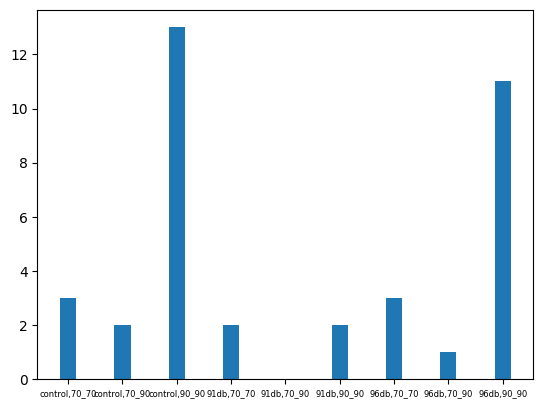

In [15]:
#plot class distributions for test dataset
groups = ['control,70_70','control,70_90','control,90_90','91db,70_70','91db,70_90','91db,90_90','96db,70_70','96db,70_90','96db,90_90']
group_len  = [len(test[(test["Group"]=="control") & (test["Levels"]=="70_70")]),len(test[(test["Group"]=="control") & (test["Levels"]=="70_90")]),len(test[(test["Group"]=="control") & (test["Levels"]=="90_90")]),len(test[(test["Group"]=="91db") & (test["Levels"]=="70_70")]),len(test[(test["Group"]=="91db") & (test["Levels"]=="70_90")]),len(test[(test["Group"]=="91db") & (test["Levels"]=="90_90")]),
             len(test[(test["Group"]=="96db") & (test["Levels"]=="70_70")]),len(test[(test["Group"]=="96db") & (test["Levels"]=="70_90")]),len(test[(test["Group"]=="96db") & (test["Levels"]=="90_90")])]
plt.xticks(fontsize = 6)
plt.bar(x= groups,height = group_len,width = 0.3)

Blue: control group

Orange: 91db group

Green: 96db group

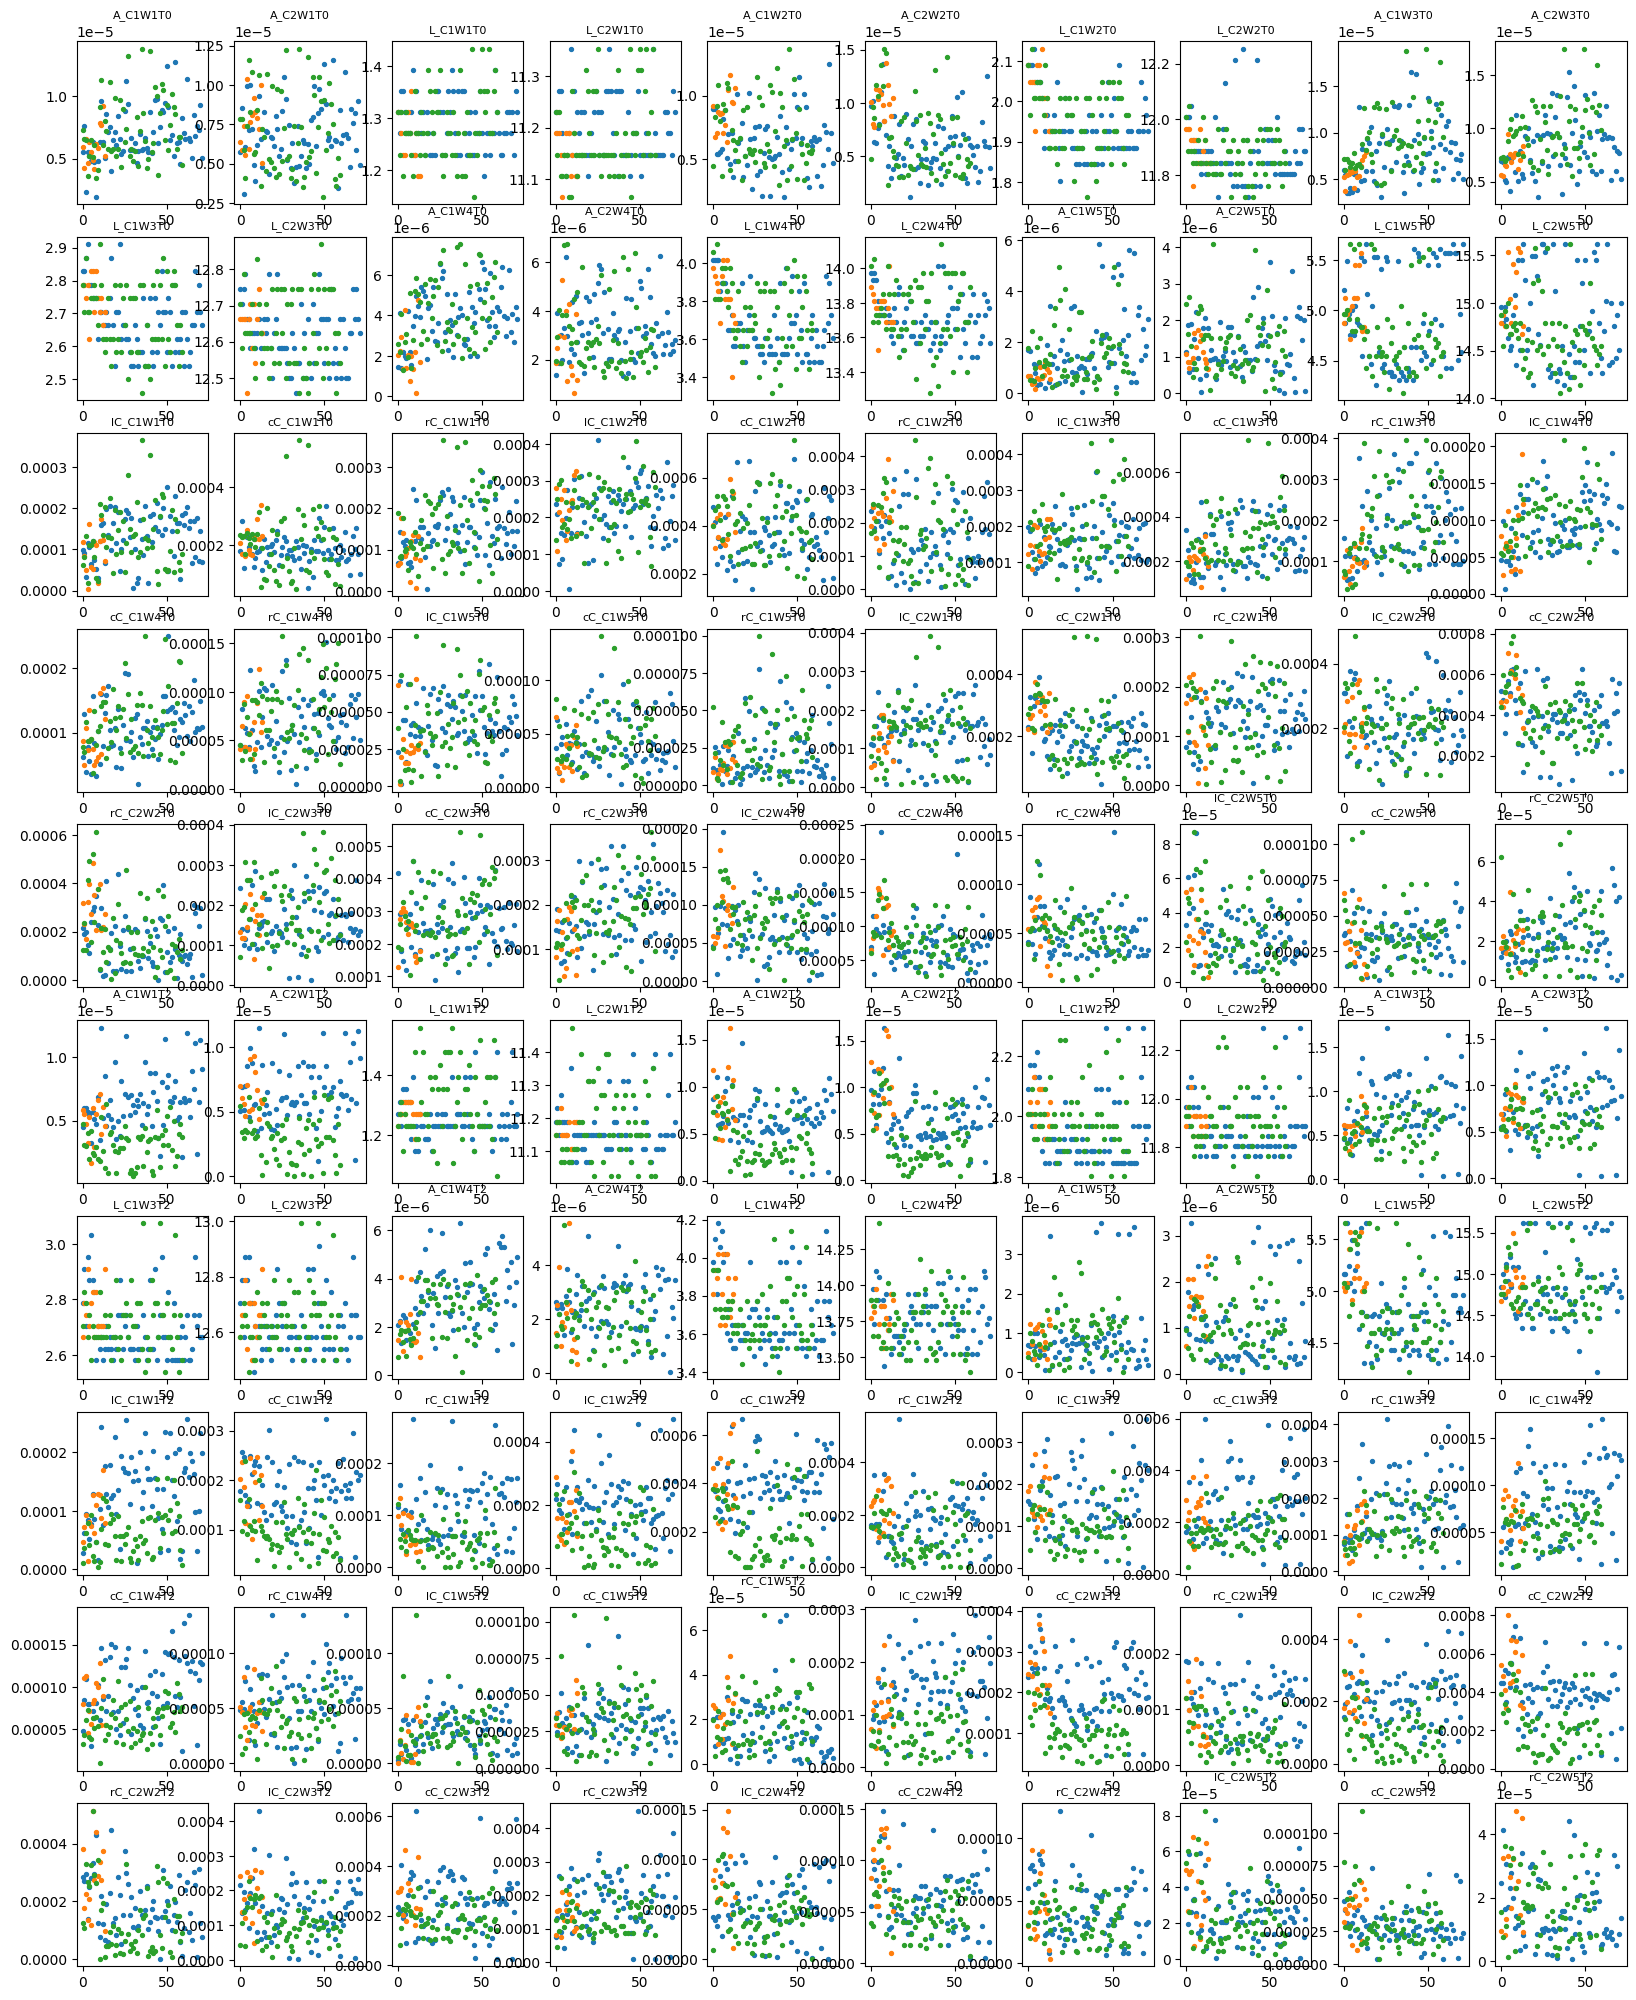

In [16]:
#plot values distributions for each vars in train dataset
g_c = data_add_train[(data_add_train["Group"]=="control")]
g_91 = data_add_train[(data_add_train["Group"]=="91db")]
g_96 = data_add_train[(data_add_train["Group"]=="96db")]
fig, axes = plt.subplots(nrows=10, ncols=10,figsize=(20,25))
for i in range(100):
  axes[int(i/10),i%10].scatter(x=range(len(g_c.iloc[:,i+2])),y = g_c.iloc[:,i+2],s=8,color = 'tab:blue')
  axes[int(i/10),i%10].scatter(x=range(len(g_91.iloc[:,i+2])),y = g_91.iloc[:,i+2],s=8,color = 'tab:orange')
  axes[int(i/10),i%10].scatter(x=range(len(g_96.iloc[:,i+2])),y = g_96.iloc[:,i+2],s=8,color = 'tab:green')
  axes[int(i/10),i%10].set_title(data_add_train.columns[i+2],fontsize = 8)

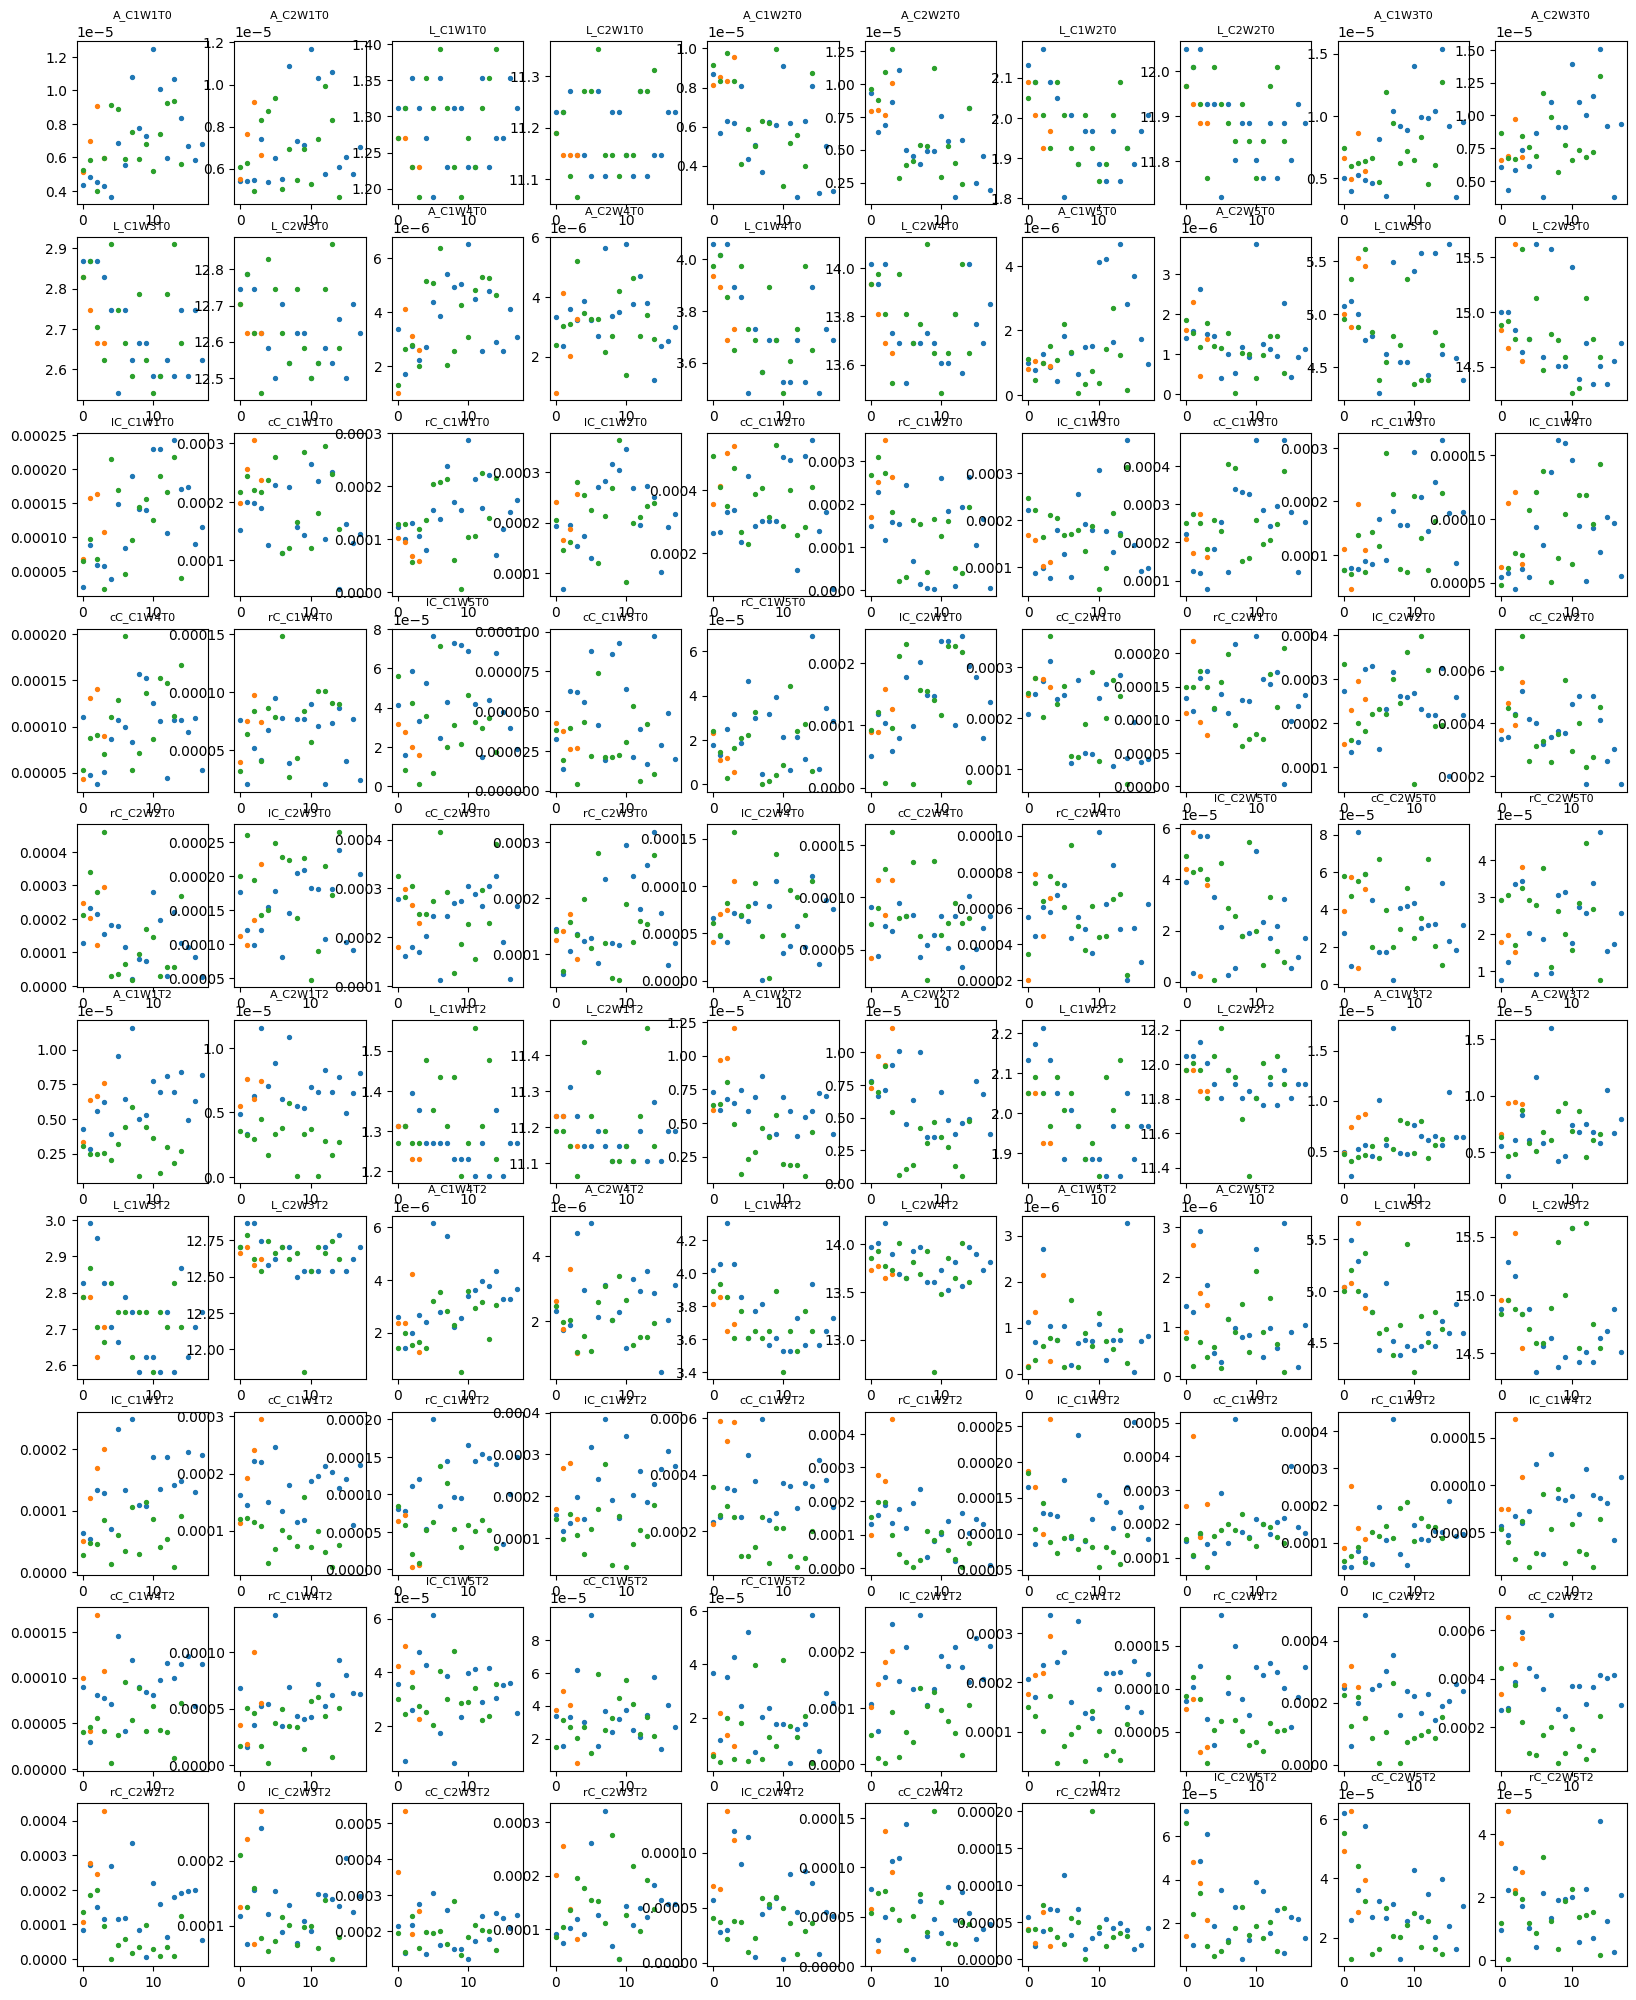

In [129]:
#plot values distributions for each vars in test dataset
g_c = data_add_test[(data_add_test["Group"]=="control")]
g_91 = data_add_test[(data_add_test["Group"]=="91db")]
g_96 = data_add_test[(data_add_test["Group"]=="96db")]
fig, axes = plt.subplots(nrows=10, ncols=10,figsize=(20,25))
for i in range(100):
  axes[int(i/10),i%10].scatter(x=range(len(g_c.iloc[:,i+2])),y = g_c.iloc[:,i+2],s=8,color = 'tab:blue')
  axes[int(i/10),i%10].scatter(x=range(len(g_91.iloc[:,i+2])),y = g_91.iloc[:,i+2],s=8,color = 'tab:orange')
  axes[int(i/10),i%10].scatter(x=range(len(g_96.iloc[:,i+2])),y = g_96.iloc[:,i+2],s=8,color = 'tab:green')
  axes[int(i/10),i%10].set_title(data_add_test.columns[i+2],fontsize = 8)

In [17]:
le = LabelEncoder()
#y_train: 0-91db, 1-96db, 2-control
X_train,y_train,X_test,y_test = data_add_train.iloc[:,1:],le.fit_transform(data_add_train.iloc[:,0]),data_add_test.iloc[:,1:],le.fit_transform(data_add_test.iloc[:,0])

In [18]:
#get dummies for the categorical values stimulus level
X_train = pd.concat([pd.get_dummies(X_train.iloc[:,0]),X_train.iloc[:,1:]],axis=1)
X_test = pd.concat([pd.get_dummies(X_test.iloc[:,0]),X_test.iloc[:,1:]],axis=1)

In [19]:
#define Kfolds
kfolds = KFold(5,shuffle=True,random_state=1)

In [79]:
#store accuracies and f1 scores
Accuracies_all = []
F1_all = []

For each algorithm, following these steps:

1. tune the paramters with grids

2. list each model's paramters

3. plot each model's performance(score)

4. fit the best model with train dataset, and then train the X_test

(5.) some models can plot the variances importances. If possible,plot them


There are many duplicated codes for scaling and oversampling:

scaling the data: scaler = preprocessing.StandardScaler() 

oversampling the train set : X, y = oversample.fit_resample(X_train_scaled,y_train)

## **XGBoost Algorithm**

In [20]:
#tune the paramters with grids
grid = {
    'max_depth': [2,4,6,9],
    'n_estimators':[50,100,150],
    'learning_rate':[0.3,0.5,1],
    'reg_alpha':[0,0.01,0.1,0.5],
    'reg_lambda':[0,0.1,1]
}
models = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train, y_train)
models.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'n_estimators': 50,
 'reg_alpha': 0,
 'reg_lambda': 1}

In [21]:
#list every model's parameters
models.cv_results_['params']

[{'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0,
  'reg_lambda': 0},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0,
  'reg_lambda': 0.1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0,
  'reg_lambda': 1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.01,
  'reg_lambda': 0},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.01,
  'reg_lambda': 0.1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.01,
  'reg_lambda': 1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.1,
  'reg_lambda': 0},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.1,
  'reg_lambda': 0.1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 50,
  'reg_alpha': 0.1,
  'reg_lambda': 1},
 {'learning_rate': 0.3,
  'max_depth': 2,
  'n_estimators': 5

<BarContainer object of 432 artists>

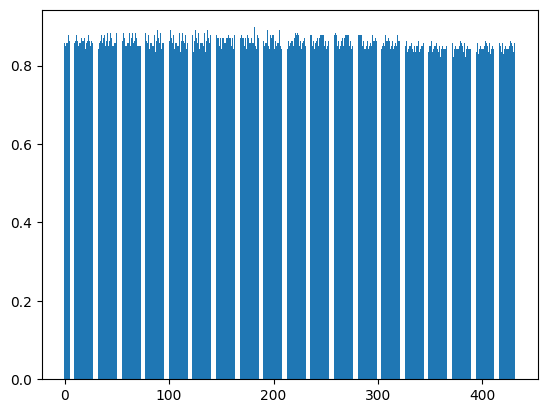

In [22]:
#plot the scores(performance) for each model
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.918918918918919
f1 score on test Dataset:  0.8977130977130977
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      1.00      1.00        15
           2       0.86      1.00      0.92        18

    accuracy                           0.92        37
   macro avg       0.95      0.75      0.77        37
weighted avg       0.93      0.92      0.90        37



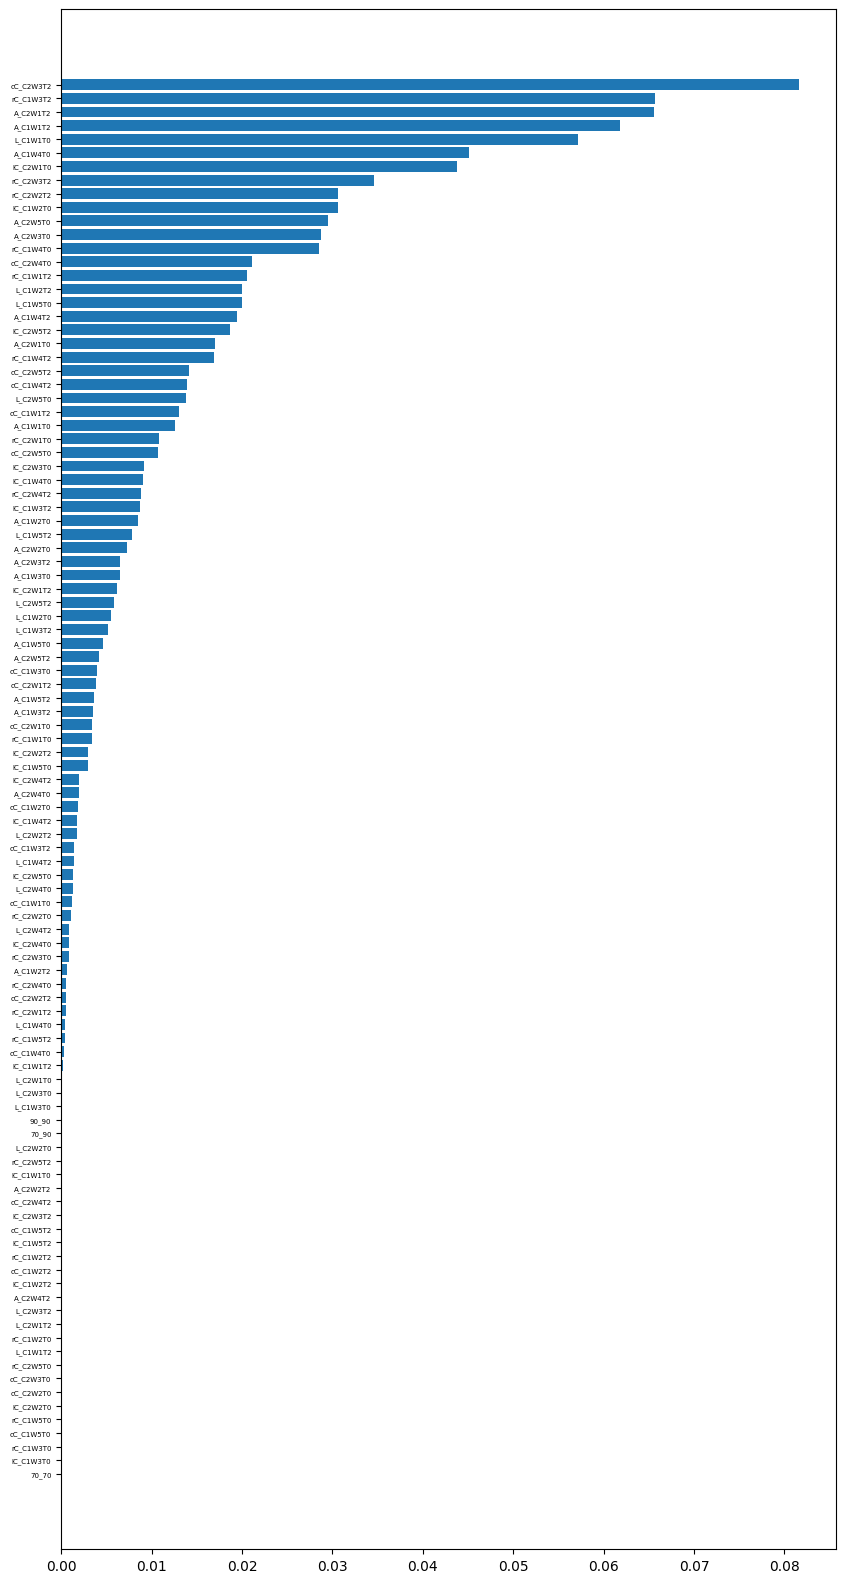

In [80]:
#fit the best model with train dataset, and then train the X_test
model = XGBClassifier(max_depth = 4, learning_rate = 0.5, n_estimators= 50,reg_lambda = 1,reg_alpha = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
Accuracies_all.append(accuracy)
F1_all.append(f1)
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

Compare our model with default parameter

In [87]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.9459459459459459
f1 score on test Dataset:  0.9383594120436227
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00        15
           2       0.90      1.00      0.95        18

    accuracy                           0.95        37
   macro avg       0.97      0.83      0.87        37
weighted avg       0.95      0.95      0.94        37



## **Adaboost**
same steps as XGBoost

In [86]:
grid = {
    'algorithm': ["SAMME","SAMME.R"],
    'n_estimators':[10,30,50,70,100,150],
    'learning_rate':[0.5,1,1.5,2]
}
models = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train, y_train)
print(models.best_params_,models.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100} 0.8565517241379311


In [88]:
models.cv_results_['params']

[{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 70},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 150},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 50},
 {'

<BarContainer object of 48 artists>

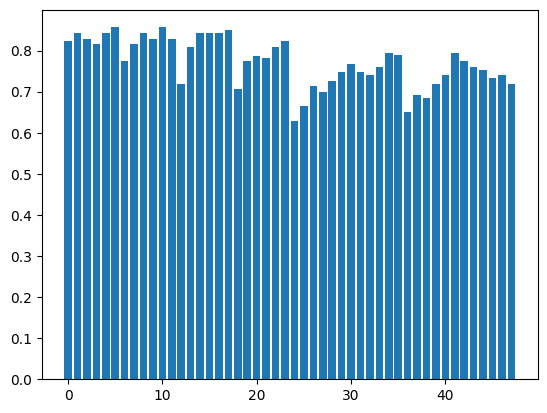

In [89]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

Accuracy on train Dataset:  0.9931506849315068
f1 score on train Dataset:  0.9931550392322497
Accuracy on test Dataset:  0.8648648648648649
f1 score on test Dataset:  0.8603811184456346
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.88      0.93      0.90        15
           2       0.89      0.89      0.89        18

    accuracy                           0.86        37
   macro avg       0.81      0.77      0.79        37
weighted avg       0.86      0.86      0.86        37



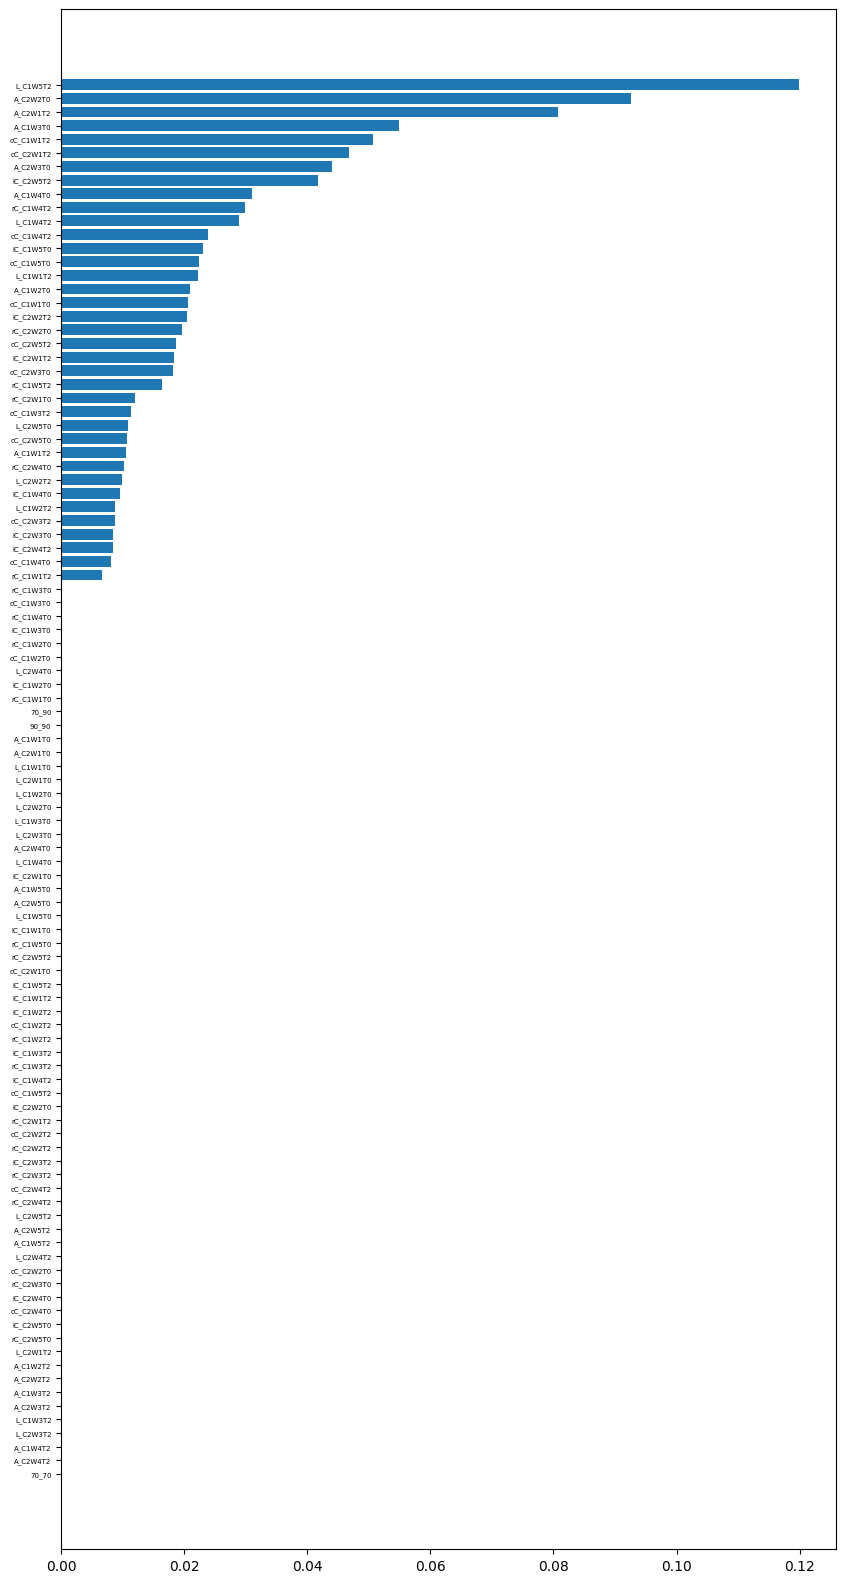

In [81]:
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators= 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
# print("Accuracy: ",accuracy)
# print("f1 score: ",f1)
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
Accuracies_all.append(accuracy)
F1_all.append(f1)
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

## **Naive Bayes**

Naive Bayes, including three sub models:

1. Not dealing with imbalance issue using GaussianNB

2. dealing with imbalance issue using GaussianNB

3. ComplementNB

In [20]:
#these priors are using evenly distributed possibility or the class possibility in train daatset
grid = {
    'priors': [None,[0.34,0.33,0.33],[len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train),len(y_train[y_train==[2]])/len(y_train)],[len(y_train[y_train==[2]])/len(y_train),len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train)]]
}
models = GridSearchCV(estimator = GaussianNB(), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models.fit(X_train_scaled, y_train)
print(models.best_params_,models.best_score_)

{'priors': [0.34, 0.33, 0.33]} 0.7535632183908045


<BarContainer object of 4 artists>

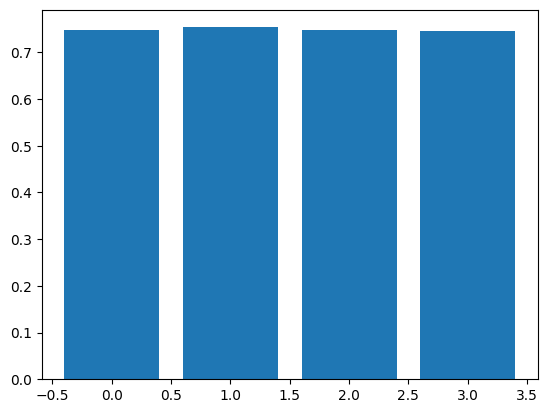

In [127]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

In [22]:
#not using SMOTE
model = GaussianNB(priors = [0.34, 0.33, 0.33])
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_scaled)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_scaled),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.7945205479452054
f1 score on train Dataset:  0.8035729725392702
Accuracy on test Dataset:  0.7027027027027027
f1 score on test Dataset:  0.6830955624059072
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.79      0.73      0.76        15
           2       0.86      0.67      0.75        18

    accuracy                           0.70        37
   macro avg       0.66      0.72      0.66        37
weighted avg       0.77      0.70      0.72        37



In [139]:
#Using Smote to deal with imbalance issue
grid = {
    'priors': [None,[0.34,0.33,0.33],[len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train),len(y_train[y_train==[2]])/len(y_train)],[len(y_train[y_train==[2]])/len(y_train),len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train)]]
}
models = GridSearchCV(estimator = GaussianNB(), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X, y = oversample.fit_resample(X_train_scaled,y_train)
models.fit(X, y)
print(models.best_params_,models.best_score_)

{'priors': [0.0958904109589041, 0.410958904109589, 0.4931506849315068]} 0.856553911205074


In [118]:
models.cv_results_['params']

[{'priors': None},
 {'priors': [0.34, 0.33, 0.33]},
 {'priors': [0.0958904109589041, 0.410958904109589, 0.4931506849315068]},
 {'priors': [0.4931506849315068, 0.0958904109589041, 0.410958904109589]}]

<BarContainer object of 4 artists>

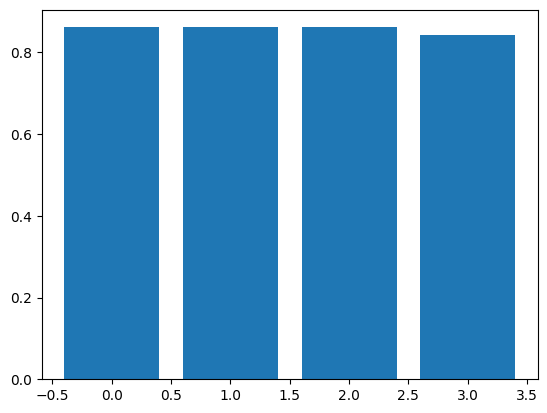

In [28]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

In [142]:
model = GaussianNB(priors = [0.0958904109589041, 0.410958904109589, 0.4931506849315068])
model.fit(X, y)
y_pred = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
Accuracies_all.append(accuracy)
F1_all.append(f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.8796296296296297
f1 score on train Dataset:  0.8774780397783307
Accuracy on test Dataset:  0.7297297297297297
f1 score on test Dataset:  0.7162162162162162
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.80      0.80      0.80        15
           2       0.86      0.67      0.75        18

    accuracy                           0.73        37
   macro avg       0.68      0.74      0.68        37
weighted avg       0.78      0.73      0.74        37



Compare Gaussian NB with ComplementNB, Complement NB performs worse than Gaussian

In [58]:
model = ComplementNB()
X, y = oversample.fit_resample(X_train,y_train)
model.fit(X, y)
y_pred = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.5462962962962963
f1 score on train Dataset:  0.44661620516751305
Accuracy on test Dataset:  0.6486486486486487
f1 score on test Dataset:  0.6028098028098028
              precision    recall  f1-score   support

           0       0.18      0.50      0.27         4
           1       0.91      0.67      0.77        15
           2       0.80      0.67      0.73        18

    accuracy                           0.65        37
   macro avg       0.63      0.61      0.59        37
weighted avg       0.78      0.65      0.69        37



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


## **SVM**

In [84]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,0.01,0.1,0.5],'C': [0.1,1,1.5,10]},
 {'kernel': ['linear'], 'C': [0.1,1,1.5,10]}]
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=kfolds)
svm_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 1.5, 10],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 1.5, 10], 'kernel': ['linear']}])

In [85]:
print('Best score for training data:', svm_model.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C)
print('Best Kernel:',svm_model.best_estimator_.kernel)
print('Best Gamma:',svm_model.best_estimator_.gamma)
model = svm_model.best_estimator_
y_pred = model.predict(X_test_scaled)

Best score for training data: 0.911264367816092
Best C: 1
Best Kernel: linear
Best Gamma: scale


In [31]:
svm_model.cv_results_['params']

[{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 0.1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1.5, 'kernel': 'linear'},
 {'C': 10, 'ke

<BarContainer object of 24 artists>

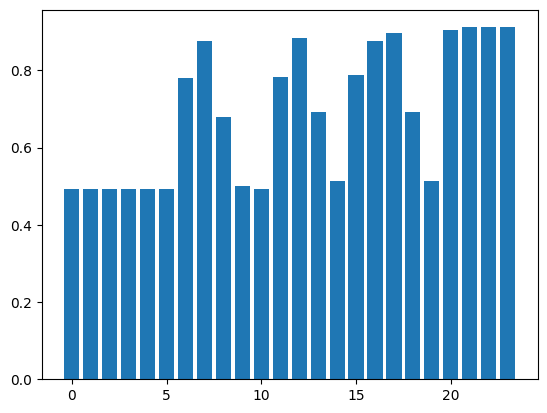

In [32]:
plt.bar(range(len(svm_model.cv_results_['mean_test_score'])),svm_model.cv_results_['mean_test_score'])

In [86]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_scaled)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_scaled),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
Accuracies_all.append(accuracy)
F1_all.append(f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.9459459459459459
f1 score on test Dataset:  0.9497615262321144
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00        15
           2       1.00      0.89      0.94        18

    accuracy                           0.95        37
   macro avg       0.89      0.96      0.91        37
weighted avg       0.96      0.95      0.95        37



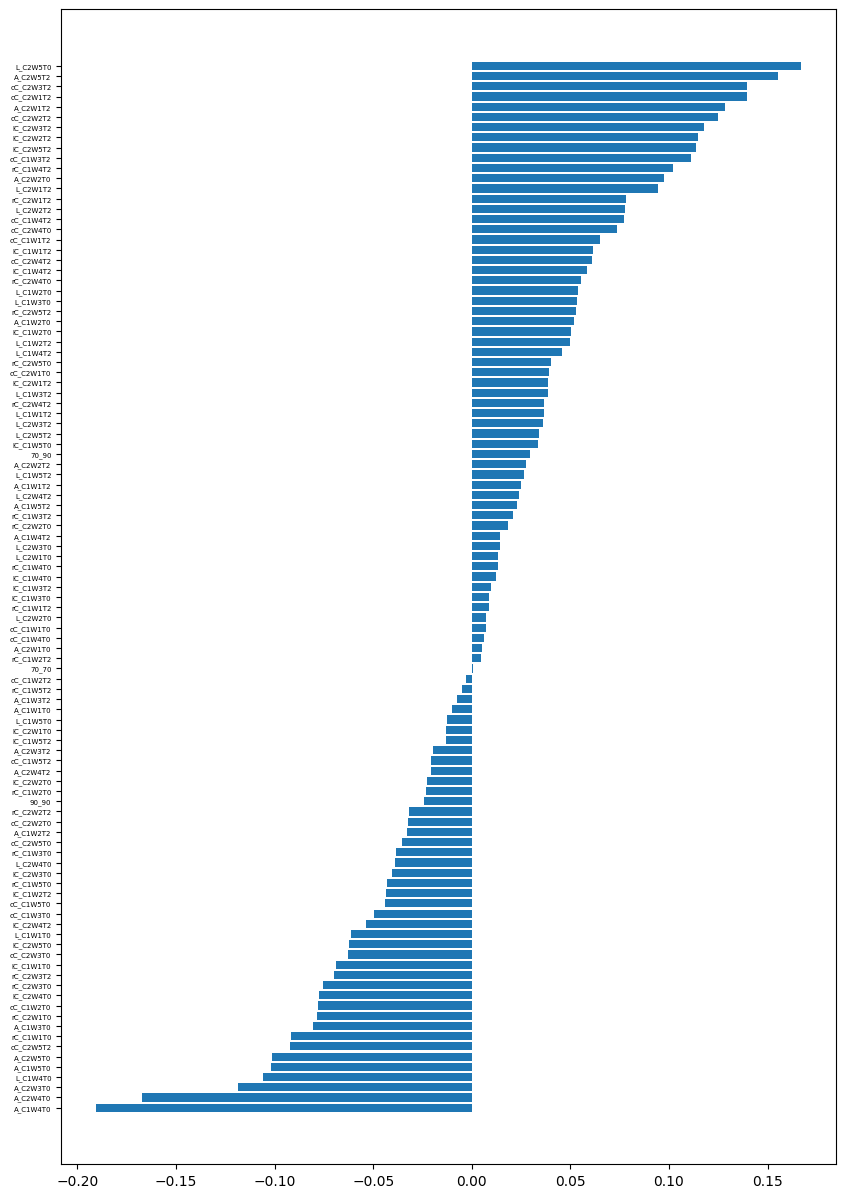

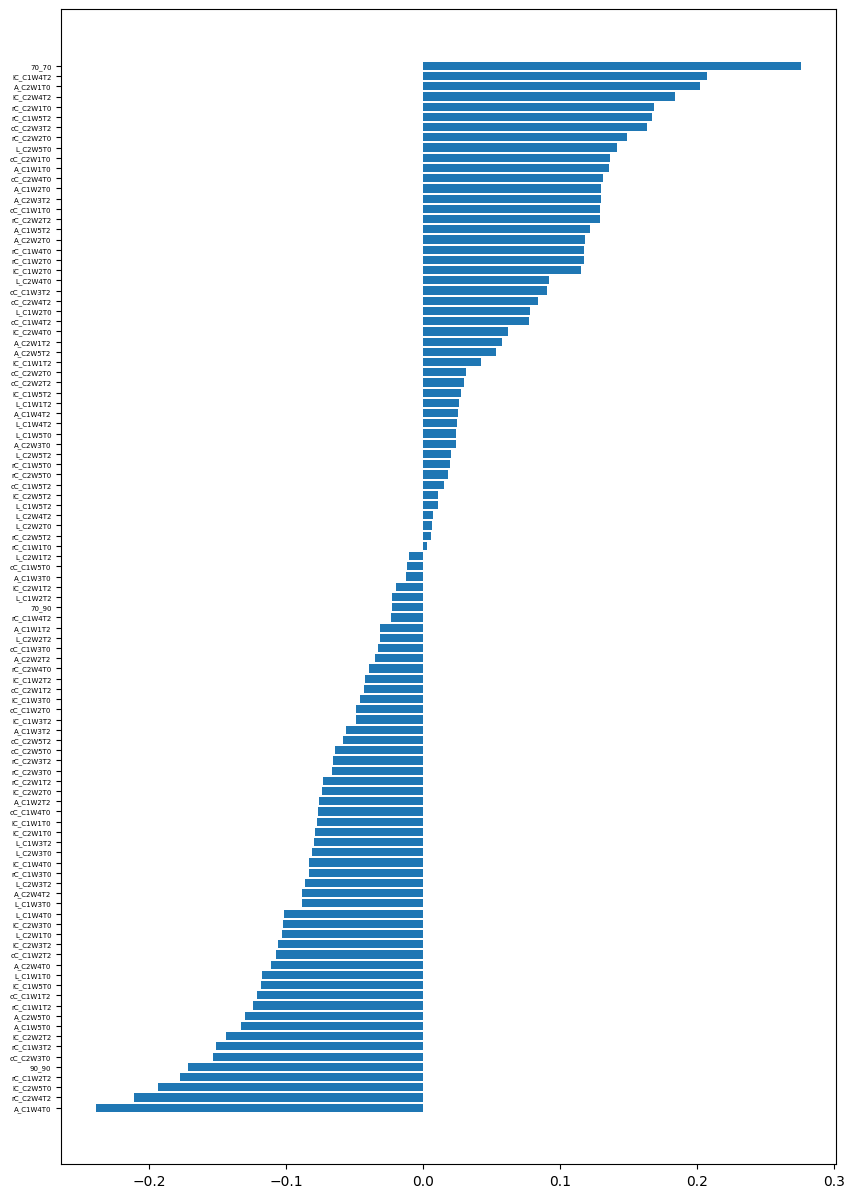

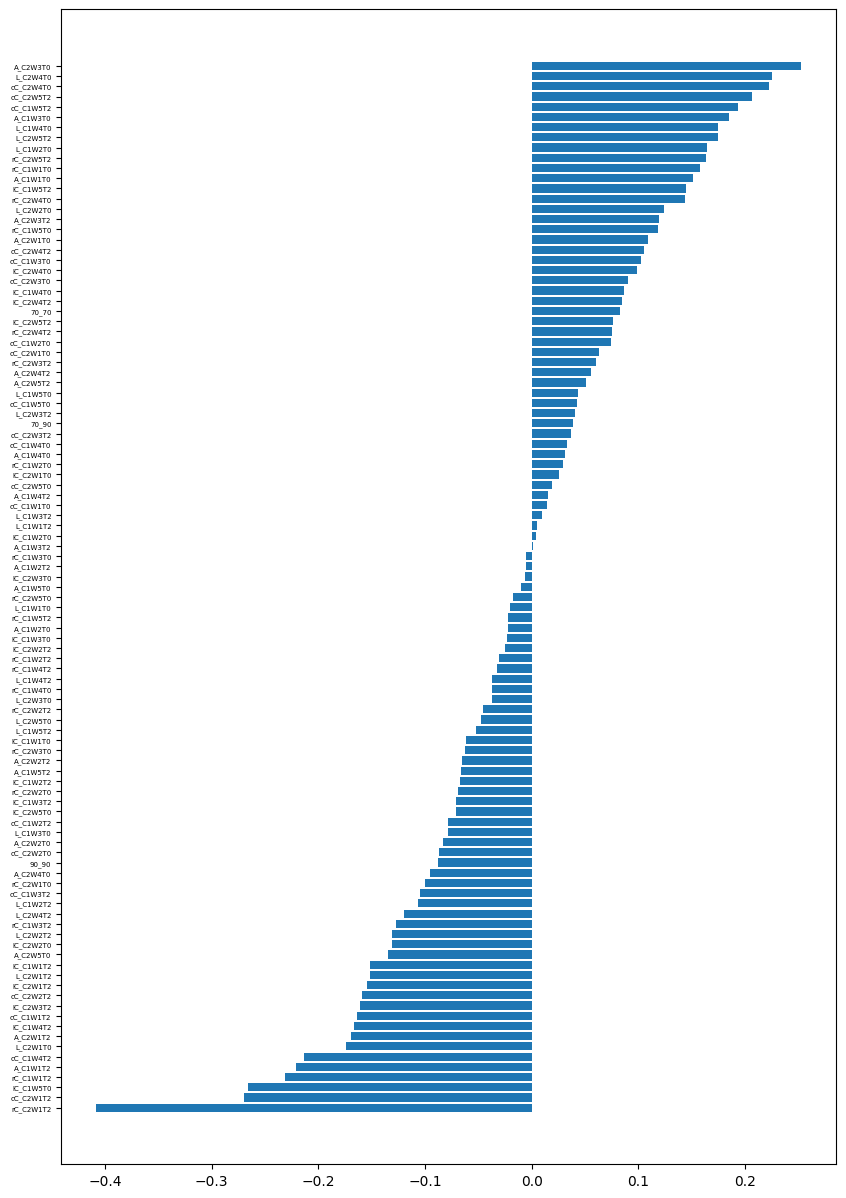

In [134]:
#plot the variable importances
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    # fig, ax = plt.subplots(figsize=(10,15))
    # ax.barh(range(len(names)), imp,align = 'center')
    # ax.tick_params(axis='y', labelsize=8)
    # _ = ax.set_yticklabels(names)
    plt.figure(figsize=(10,15))
    plt.barh(range(len(names)), imp, align='center')
    plt.tick_params(axis='y', labelsize=5)
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(model.coef_[0], X_train.columns)
f_importances(model.coef_[1], X_train.columns)
f_importances(model.coef_[2], X_train.columns)

## **Neural Network**

In [40]:
in_dim = len(X_train.columns)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train,data_add_train.iloc[:,0])
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test)

Build model because we cannot tune the NNmodel directly with paramters

In [39]:
def NNModel(nodes,layer,actf,optimz):
  model = Sequential()
  for i in range(layer):
    model.add(Dense(100, input_dim = in_dim, activation = actf))
  model.add(Dense(3, activation = 'softmax'))
  if(optimz=="SGD"):
    opt = SGD(learning_rate = 0.01)
  else:
    opt = 'Adam'
  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
  return model

use Neurons(50/100),activation function(relu/sigmoid),optimization function(SGD/Adam) to compare the performance manually

In [41]:
accuracies = []
model = NNModel(50,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())

*****Model Accuracy: 83.00% (16.64%)


*****Model Accuracy: 96.29% (1.87%)


*****Model Accuracy: 33.36% (16.20%)


*****Model Accuracy: 95.37% (2.55%)


*****Model Accuracy: 93.97% (3.16%)
*****Model Accuracy: 96.29% (2.38%)


*****Model Accuracy: 28.71% (8.15%)


*****Model Accuracy: 94.90% (2.72%)


In [42]:
print('Accuracies in order:\n',
      '50 Neurons/layer,relu,SGD\n','50 Neurons/layer,relu,Adam,\n','50 Neurons/layer,sigmoid,SGD\n','50 Neurons/layer,sigmoid,Adam,\n','50 Neurons/layer,relu,SGD\n','50 Neurons/layer,relu,Adam,\n','50 Neurons/layer,sigmoid,SGD\n','50 Neurons/layer,sigmoid,Adam,\n')

Accuracies in order:
 50 Neurons/layer,relu,SGD
 50 Neurons/layer,relu,Adam,
 50 Neurons/layer,sigmoid,SGD
 50 Neurons/layer,sigmoid,Adam,
 50 Neurons/layer,relu,SGD
 50 Neurons/layer,relu,Adam,
 50 Neurons/layer,sigmoid,SGD
 50 Neurons/layer,sigmoid,Adam,



<BarContainer object of 8 artists>

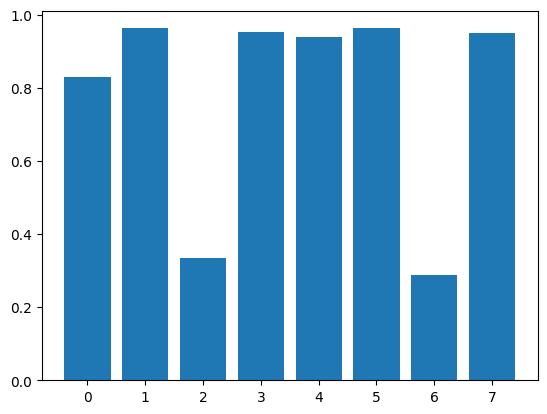

In [43]:
plt.bar(range(len(accuracies)),accuracies)

In [126]:
in_dim = len(X_train.columns)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test)
#build the best model from previous selection
model = Sequential()
model.add(Dense(100, input_dim = in_dim, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(train_features, pd.get_dummies(y), epochs = 30, batch_size = 16,verbose = 2)
scores = model.evaluate(test_features, pd.get_dummies(y_test))
for i, m in enumerate(model.metrics_names): #print loss and accuracy
    print("\n%s: %.3f"% (m, scores[i]))
y_pred = model.predict(test_features).round() #to get the predicted class for X_test after scaling
f1 = metrics.f1_score(y_pred,pd.get_dummies(y_test),average = 'weighted')
print(f1)
print(metrics.classification_report(pd.DataFrame(y_pred),pd.get_dummies(y_test)))
Accuracies_all.append(scores[1])
F1_all.append(f1)

Epoch 1/30
14/14 - 3s - loss: 0.8290 - accuracy: 0.6574 - 3s/epoch - 187ms/step
Epoch 2/30
14/14 - 0s - loss: 0.3841 - accuracy: 0.9074 - 103ms/epoch - 7ms/step
Epoch 3/30
14/14 - 0s - loss: 0.1723 - accuracy: 0.9722 - 69ms/epoch - 5ms/step
Epoch 4/30
14/14 - 0s - loss: 0.0807 - accuracy: 0.9861 - 94ms/epoch - 7ms/step
Epoch 5/30
14/14 - 0s - loss: 0.0471 - accuracy: 1.0000 - 89ms/epoch - 6ms/step
Epoch 6/30
14/14 - 0s - loss: 0.0199 - accuracy: 1.0000 - 72ms/epoch - 5ms/step
Epoch 7/30
14/14 - 0s - loss: 0.0100 - accuracy: 1.0000 - 70ms/epoch - 5ms/step
Epoch 8/30
14/14 - 0s - loss: 0.0070 - accuracy: 1.0000 - 52ms/epoch - 4ms/step
Epoch 9/30
14/14 - 0s - loss: 0.0048 - accuracy: 1.0000 - 50ms/epoch - 4ms/step
Epoch 10/30
14/14 - 0s - loss: 0.0037 - accuracy: 1.0000 - 58ms/epoch - 4ms/step
Epoch 11/30
14/14 - 0s - loss: 0.0030 - accuracy: 1.0000 - 51ms/epoch - 4ms/step
Epoch 12/30
14/14 - 0s - loss: 0.0025 - accuracy: 1.0000 - 50ms/epoch - 4ms/step
Epoch 13/30
14/14 - 0s - loss: 0.002

2/2 [==============================] - 0s 9ms/step - loss: 0.1344 - accuracy: 0.9459



loss: 0.134

accuracy: 0.946
2/2 [==============================] - 0s 9ms/step
0.9421303656597775
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00        15
           2       0.89      1.00      0.94        16

   micro avg       0.95      0.95      0.95        37
   macro avg       0.96      0.89      0.91        37
weighted avg       0.95      0.95      0.94        37
 samples avg       0.95      0.95      0.95        37



## **Random Forest**

In [145]:
grid = {
    'criterion':["squared_error","absolute_error"],
    'max_depth': [2,3,5,7,10],
    'max_features': [3,10,"sqrt"],
    'n_estimators':[50,100,150]
}
model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= kfolds)
X, y = oversample.fit_resample(X_train,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
model.fit(train_features, y)
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 10,
 'n_estimators': 150}

In [146]:
model.cv_results_['params']

[{'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 3,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'm

<BarContainer object of 90 artists>

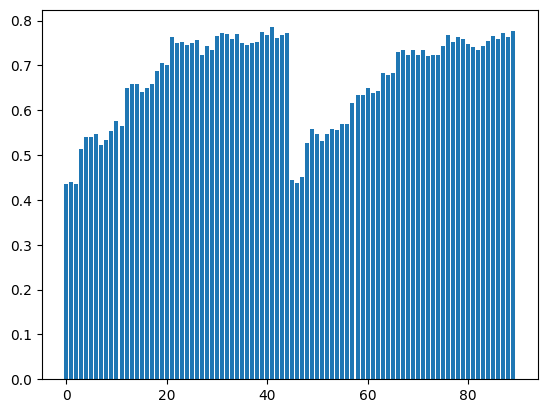

In [147]:
plt.bar(range(len(model.cv_results_['mean_test_score'])),model.cv_results_['mean_test_score'])

In [119]:
model = RandomForestRegressor(criterion = 'squared_error',max_depth = 10,max_features = 10,n_estimators= 150)
X, y = oversample.fit_resample(X_train,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test)
model.fit(train_features, y)
y_pred = model.predict(test_features)
accuracy = metrics.accuracy_score(y_test, [round(i) for i in y_pred])
f1 = metrics.f1_score(y_test,[round(i) for i in y_pred], average='weighted')
print("Accuracy on Train dataset:", metrics.accuracy_score(y, [round(i) for i in model.predict(train_features)]))
print("F1 on Train dataset:", metrics.f1_score(y, [round(i) for i in model.predict(train_features)],average = 'weighted'))
print("Accuracy on Test dataset:", accuracy)
print("F1 on Test dataset:", f1)
print(metrics.classification_report(y_test,  [round(i) for i in y_pred]))
Accuracies_all.append(accuracy)
F1_all.append(f1)

Accuracy on Train dataset: 0.9953703703703703
F1 on Train dataset: 0.9953701470942851
Accuracy on Test dataset: 0.7297297297297297
F1 on Test dataset: 0.6932432432432432
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75        15
           2       1.00      0.67      0.80        18

    accuracy                           0.73        37
   macro avg       0.53      0.56      0.52        37
weighted avg       0.73      0.73      0.69        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


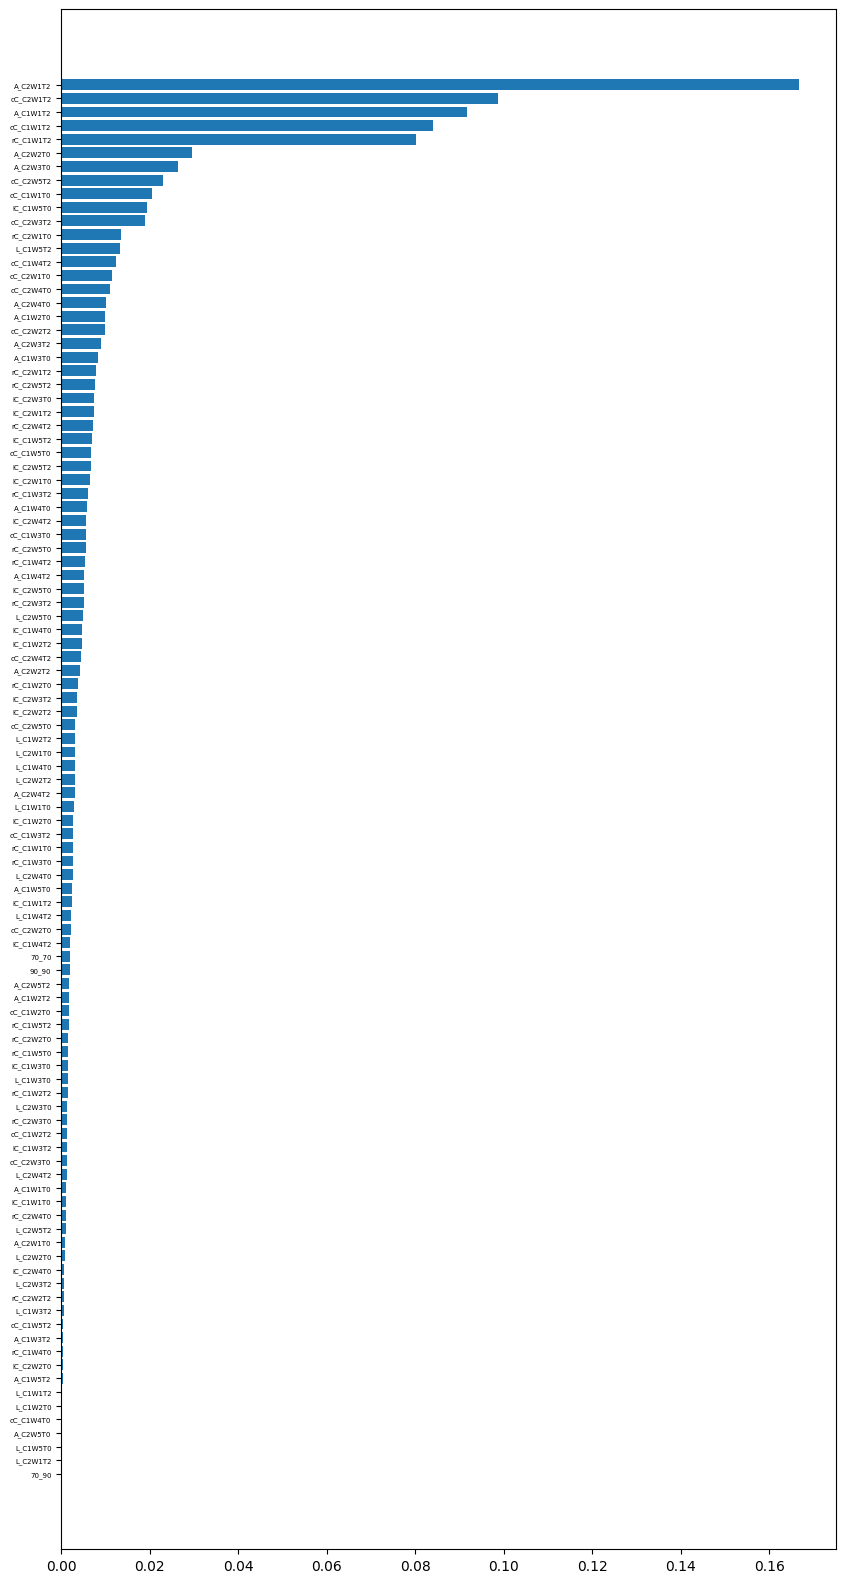

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

## **Logistic**

In [94]:
grid = {
    'penalty': ['l1', 'l2'],
    'C':[0.5,1,1.5],
    'tol':[0.0001,0.001,0.01,0.1]
}
models = GridSearchCV(estimator=LogisticRegression(solver = 'liblinear',multi_class = 'ovr'), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X, y = oversample.fit_resample(X_train_scaled,y_train)
models.fit(X, y)
models.best_params_

{'C': 1, 'penalty': 'l1', 'tol': 0.01}

In [33]:
models.cv_results_['params']

[{'C': 0.5, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.001},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.01},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.1},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.001},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.01},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.1},
 {'C': 1, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 1, 'penalty': 'l1', 'tol': 0.001},
 {'C': 1, 'penalty': 'l1', 'tol': 0.01},
 {'C': 1, 'penalty': 'l1', 'tol': 0.1},
 {'C': 1, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 1, 'penalty': 'l2', 'tol': 0.001},
 {'C': 1, 'penalty': 'l2', 'tol': 0.01},
 {'C': 1, 'penalty': 'l2', 'tol': 0.1},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.001},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.01},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.1},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.001},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.01},
 {'C': 1.5, 'p

<BarContainer object of 24 artists>

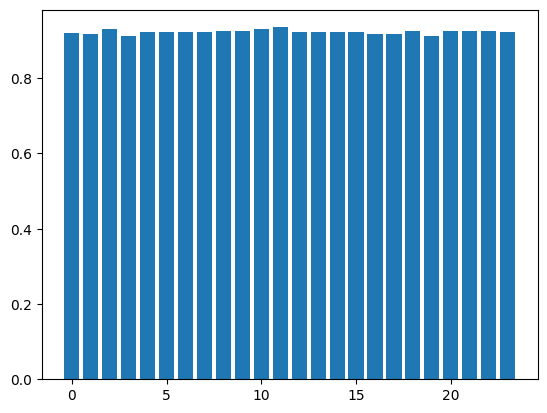

In [34]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.918918918918919
f1 score on test Dataset:  0.9262899262899263
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      1.00      1.00        15
           2       1.00      0.83      0.91        18

    accuracy                           0.92        37
   macro avg       0.86      0.94      0.88        37
weighted avg       0.95      0.92      0.93        37



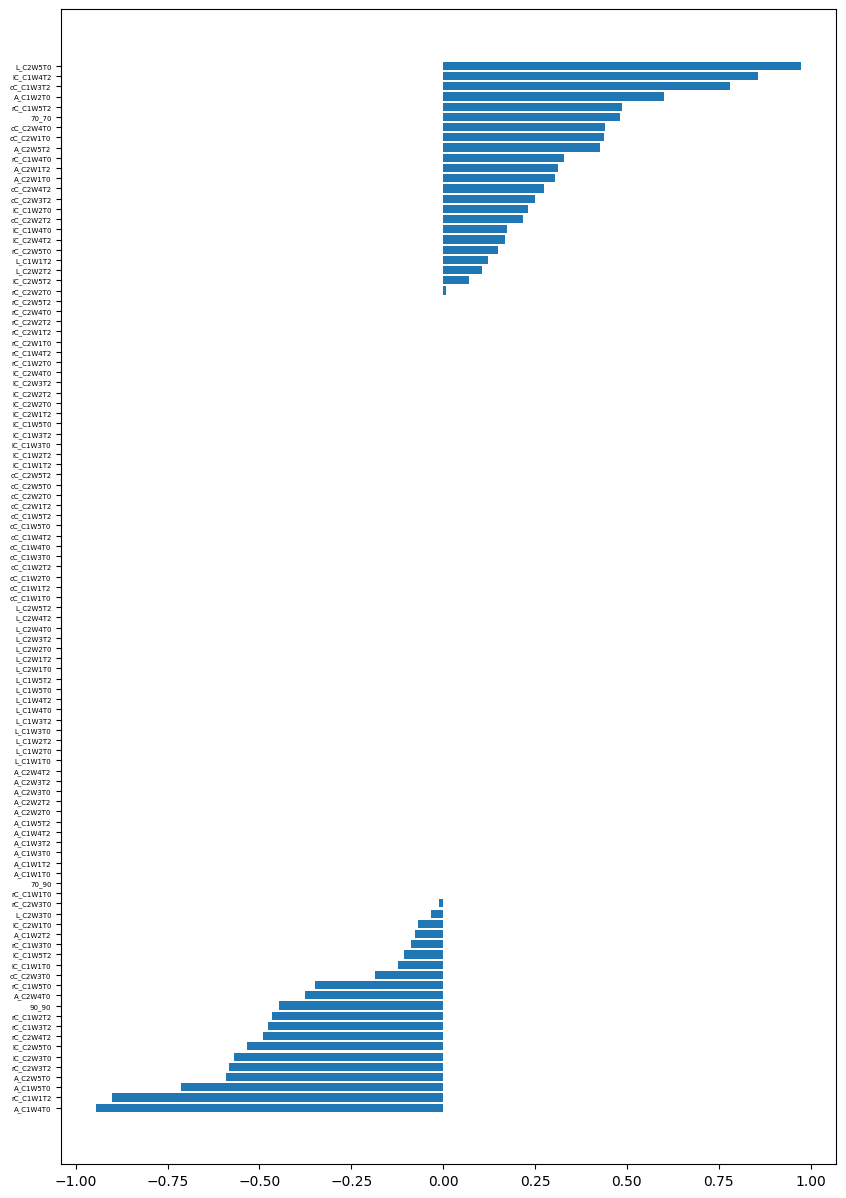

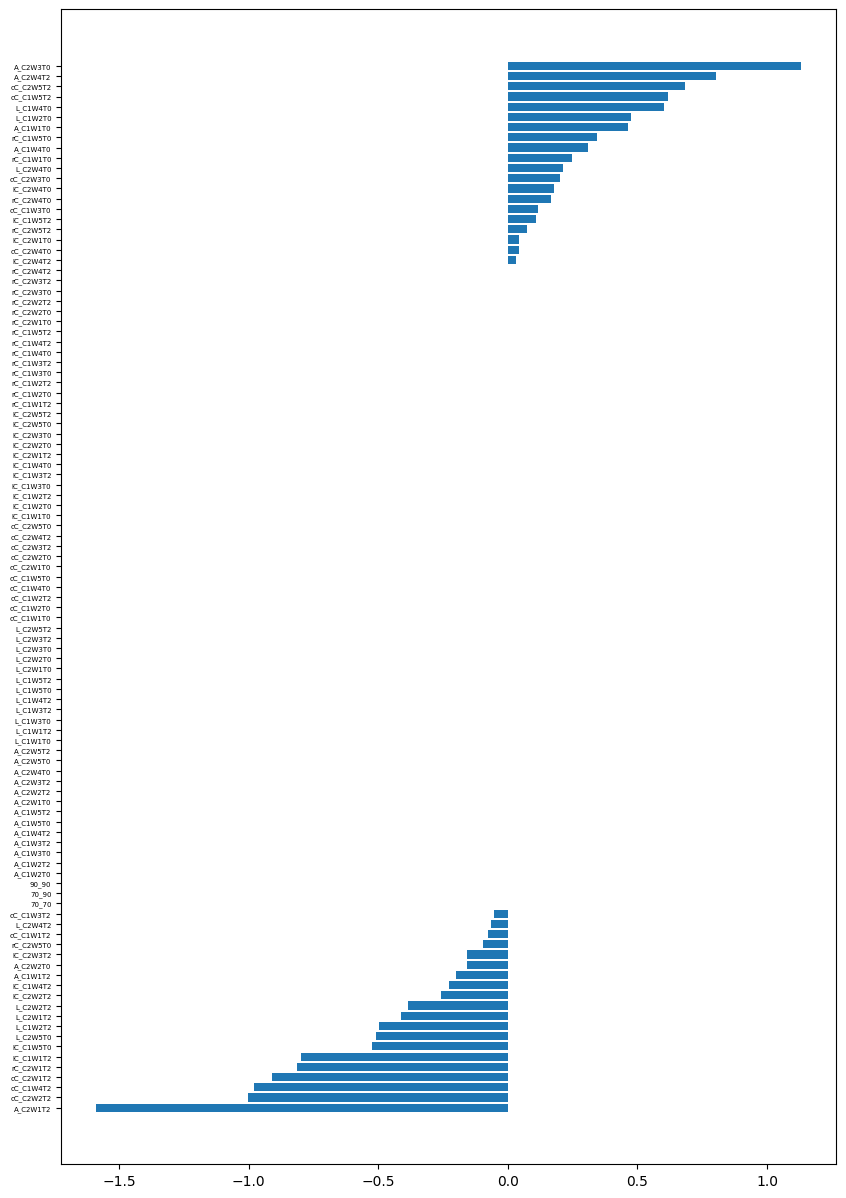

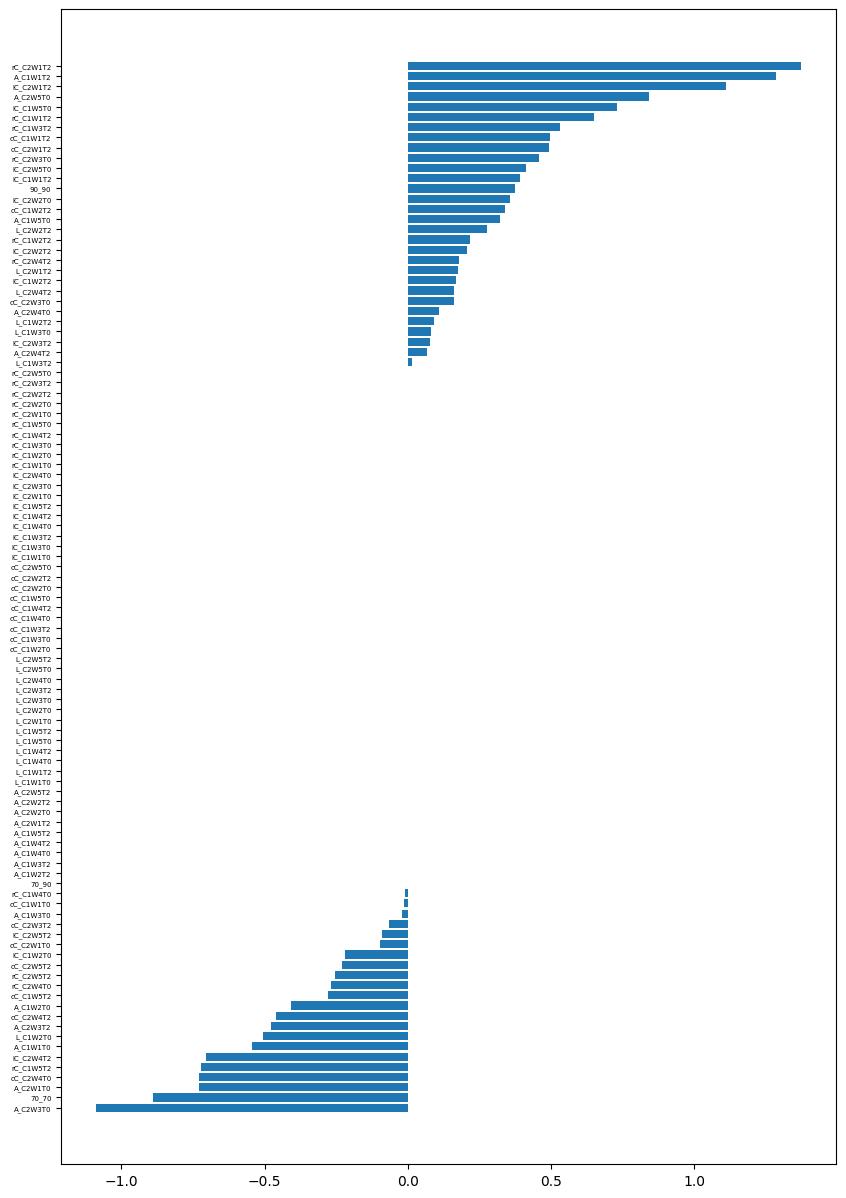

In [96]:
model = LogisticRegression(solver = 'liblinear',multi_class = 'ovr', C =  1, penalty = 'l1', tol = 0.01)
model.fit(X, y)
y_pred = model.predict(X_test_scaled)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
Accuracies_all.append(accuracy)
F1_all.append(f1)
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(10,15))
    plt.barh(range(len(names)), imp, align='center')
    plt.tick_params(axis='y', labelsize=5)
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(model.coef_[0], X_train.columns)
f_importances(model.coef_[1], X_train.columns)
f_importances(model.coef_[2], X_train.columns)

## **Accuracies and F1 score for each algorithm**

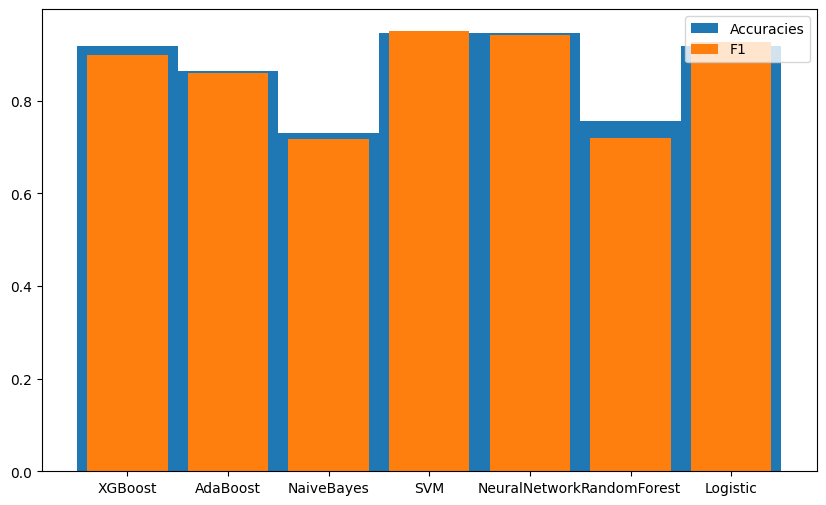

In [127]:
algos = ['XGBoost','AdaBoost','NaiveBayes','SVM','NeuralNetwork','RandomForest','Logistic']
plt.figure(figsize=(10,6))
plt.bar(algos,Accuracies_all,width =1,label = 'Accuracies')
plt.bar(algos,F1_all,label = 'F1')
plt.legend()

## **What happens if we only use the T2 variables? **
## **Repeat above steps/algorithms with T2 variables(+stimulus level) olnly **

In [43]:
X_train_T2 = pd.concat([X_train.iloc[:,:3],X_train.iloc[:,53:]],axis=1)
X_test_T2 = pd.concat([X_test.iloc[:,:3],X_test.iloc[:,53:]],axis=1)

## **XGBoost for T2 only**



In [133]:
grid = {
    'max_depth': [2,4,6,9],
    'n_estimators':[100,150],
    'learning_rate':[0.3,0.5,1],
    'reg_alpha':[0,0.01,0.1,0.5],
    'reg_lambda':[0,0.1,1]
}
models = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_T2, y_train)
models.best_params_

{'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 100,
 'reg_alpha': 0.5,
 'reg_lambda': 0}

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8378378378378378
f1 score on test Dataset:  0.8410117897783932
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.94      1.00      0.97        15
           2       0.88      0.78      0.82        18

    accuracy                           0.84        37
   macro avg       0.74      0.76      0.75        37
weighted avg       0.85      0.84      0.84        37



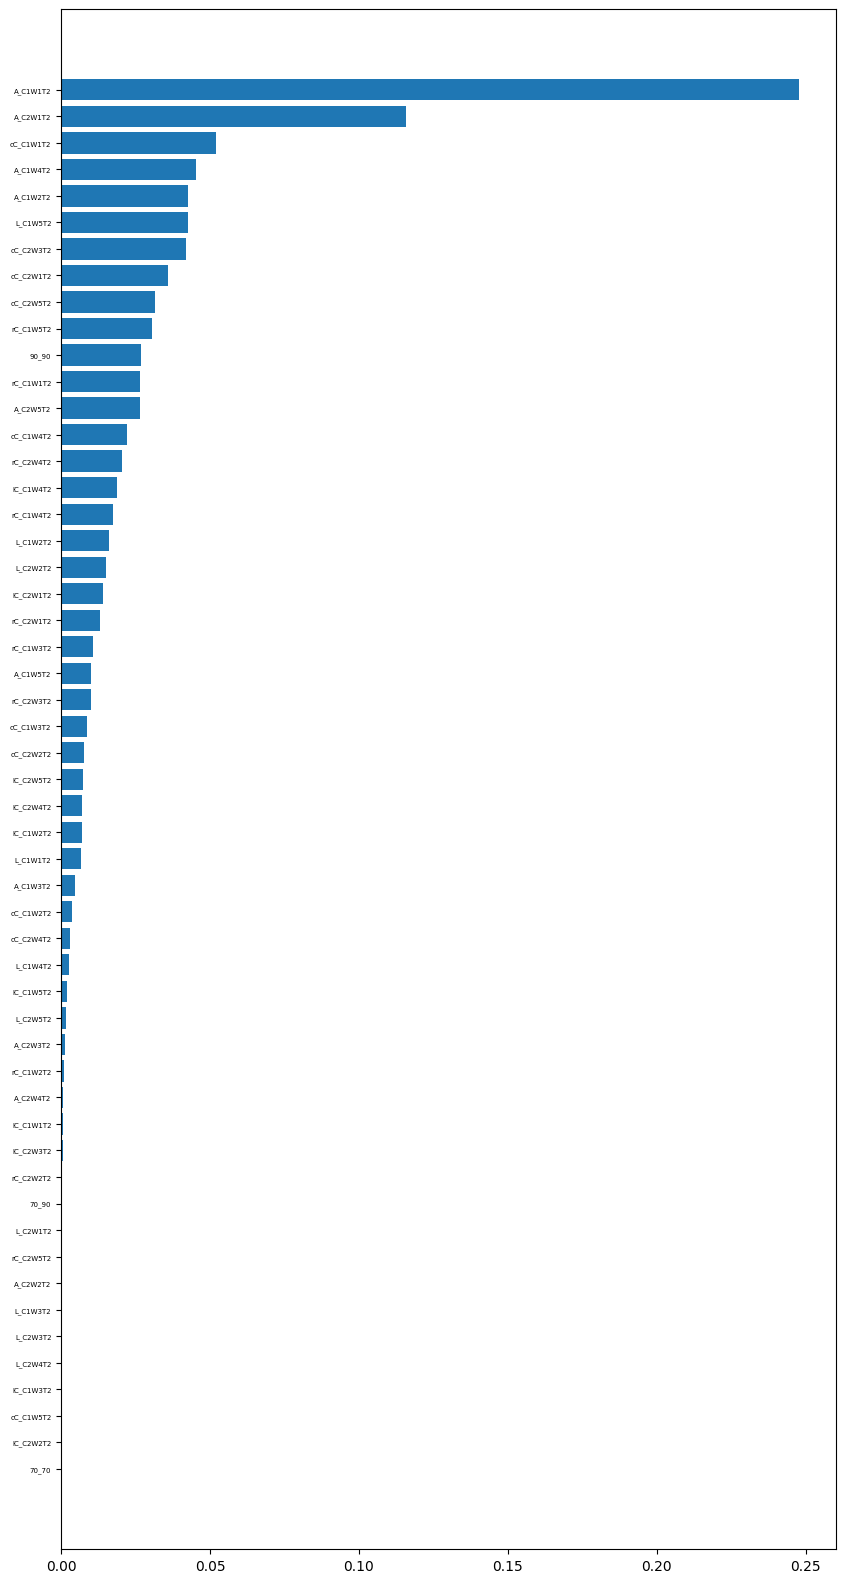

In [138]:
model = XGBClassifier(max_depth = 2, learning_rate = 0.3, n_estimators= 100,reg_lambda =0,reg_alpha = 0.5)
model.fit(X_train_T2, y_train)
y_pred = model.predict(X_test_T2)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T2)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T2),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T2.columns)[indices])

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8378378378378378
f1 score on test Dataset:  0.8410117897783932
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.94      1.00      0.97        15
           2       0.88      0.78      0.82        18

    accuracy                           0.84        37
   macro avg       0.74      0.76      0.75        37
weighted avg       0.85      0.84      0.84        37



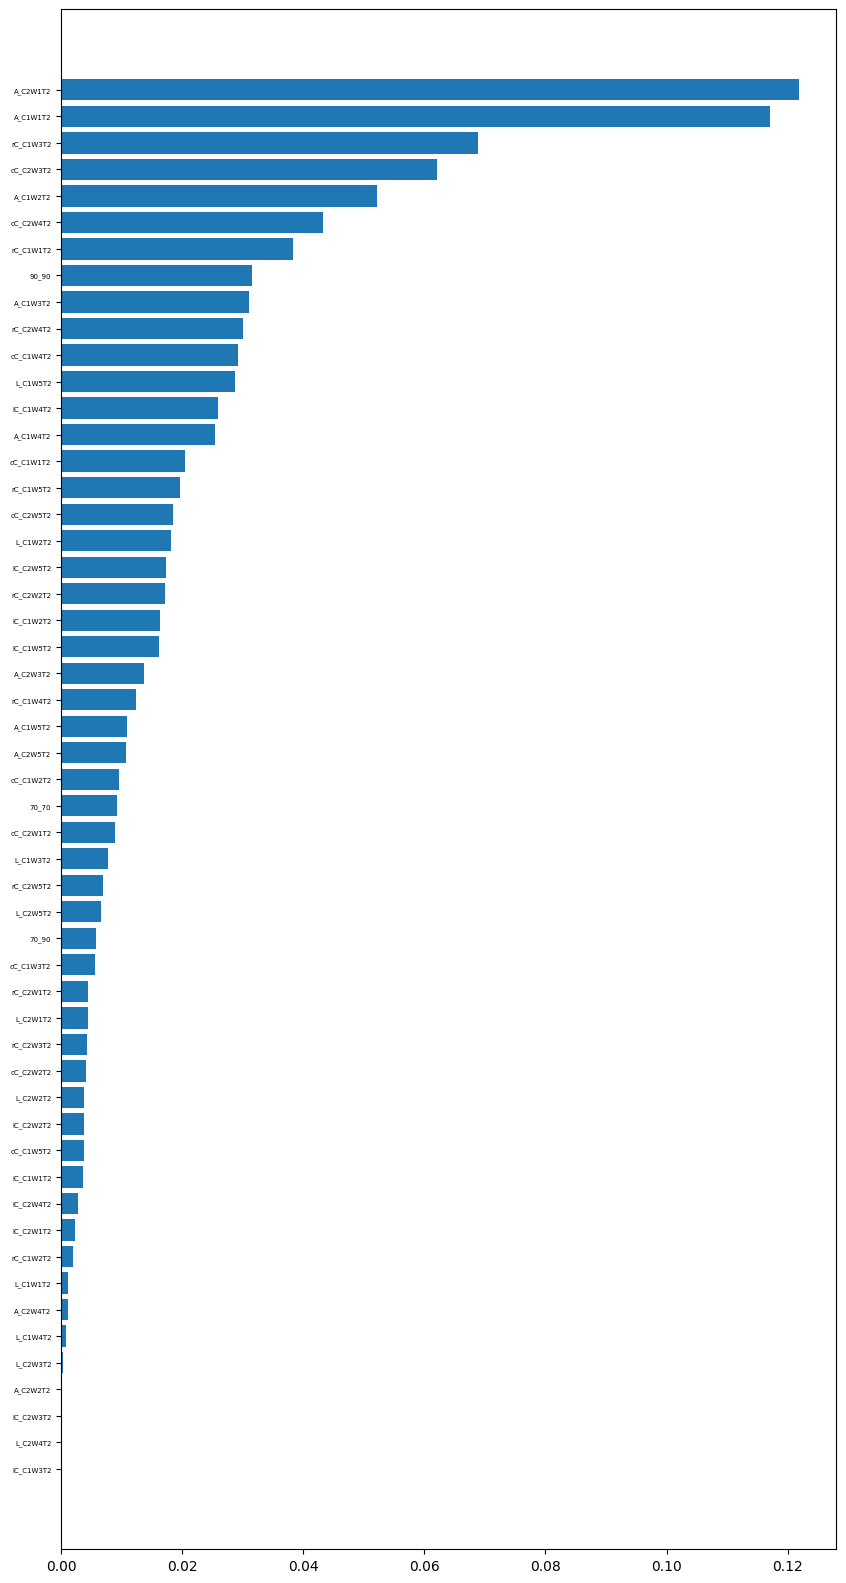

In [49]:
#Now we compare with default parametrs, our chosen model performs better than de the default model.
model = XGBClassifier()
model.fit(X_train_T2, y_train)
y_pred = model.predict(X_test_T2)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T2)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T2),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T2.columns)[indices])

## **Adaboost for T2 only**

In [51]:
grid = {
    'algorithm': ["SAMME","SAMME.R"],
    'n_estimators':[10,30,50,70,100,150],
    'learning_rate':[0.5,1,1.5,2]
}
models = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_T2, y_train)
print(models.best_params_,models.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10} 0.8429885057471264


In [54]:
models.cv_results_['params']

[{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 70},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100},
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 150},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100},
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 10},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 30},
 {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 50},
 {'

<BarContainer object of 48 artists>

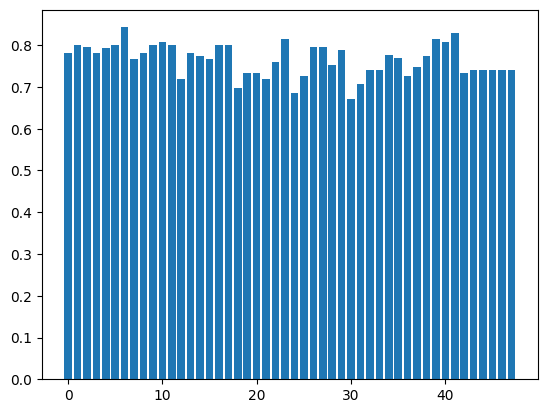

In [53]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

Accuracy on train Dataset:  0.8835616438356164
f1 score on train Dataset:  0.880074029363915
Accuracy on test Dataset:  0.8648648648648649
f1 score on test Dataset:  0.8515783688197482
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       1.00      0.93      0.97        15
           2       0.81      0.94      0.87        18

    accuracy                           0.86        37
   macro avg       0.77      0.71      0.72        37
weighted avg       0.85      0.86      0.85        37



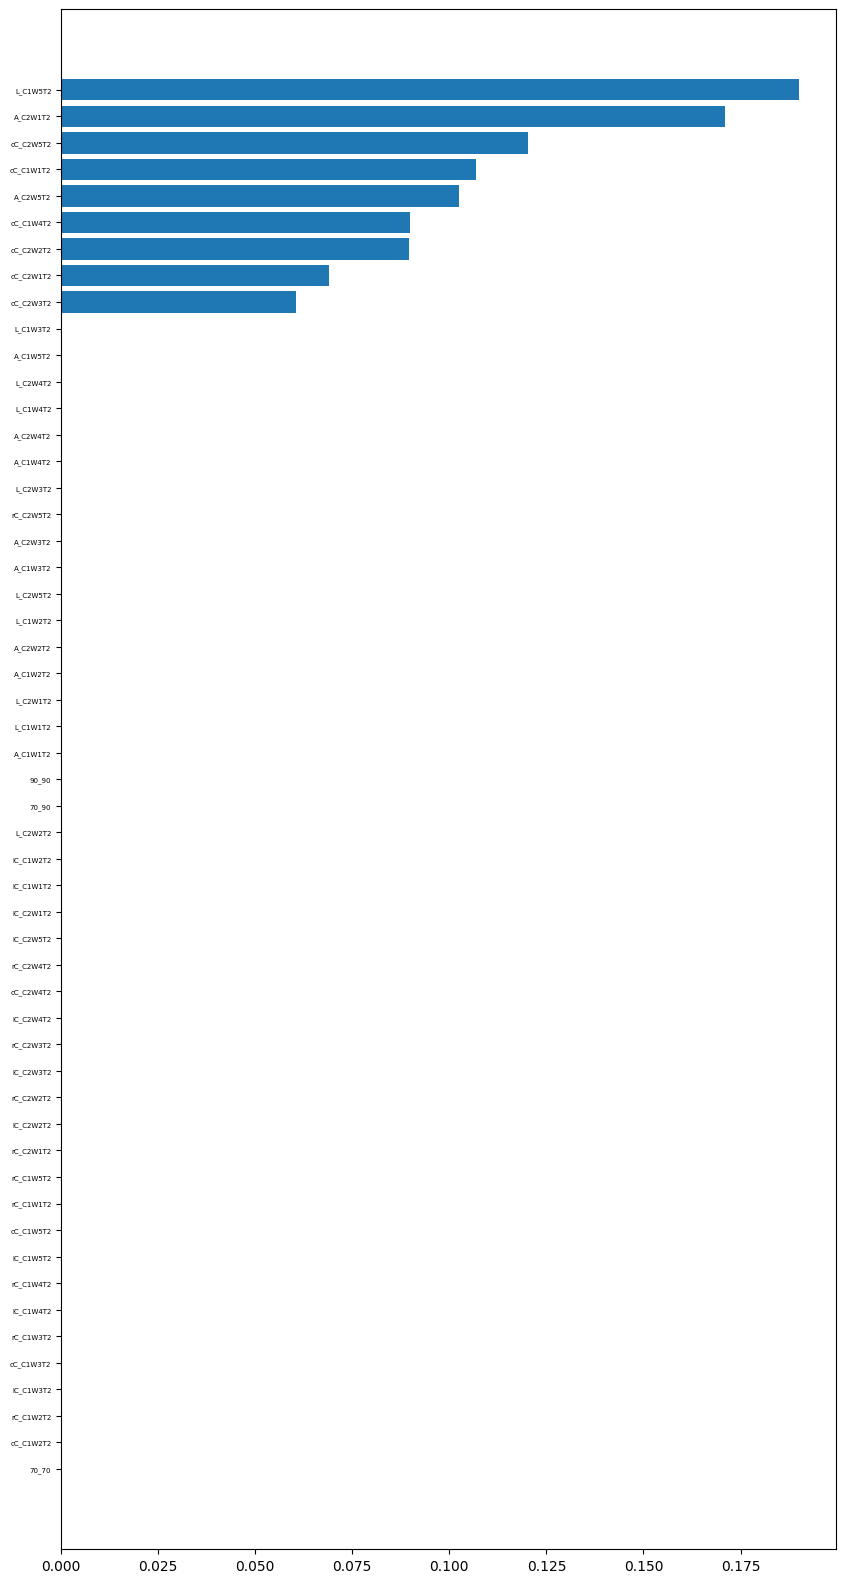

In [44]:
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators= 10)
model.fit(X_train_T2, y_train)
y_pred = model.predict(X_test_T2)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
# print("Accuracy: ",accuracy)
# print("f1 score: ",f1)
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T2)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T2),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T2.columns)[indices])

## **GaussianNB for T2 only**

In [55]:
grid = {
    'priors': [None,[0.34,0.33,0.33],[len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train),len(y_train[y_train==[2]])/len(y_train)],[len(y_train[y_train==[2]])/len(y_train),len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train)]]
}
models = GridSearchCV(estimator = GaussianNB(), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_T2_scaled = scaler.fit_transform(X_train_T2)
X_test_T2_scaled = scaler.transform(X_test_T2)
models.fit(X_train_T2_scaled, y_train)
print(models.best_params_,models.best_score_)

{'priors': None} 0.7190804597701149


<BarContainer object of 4 artists>

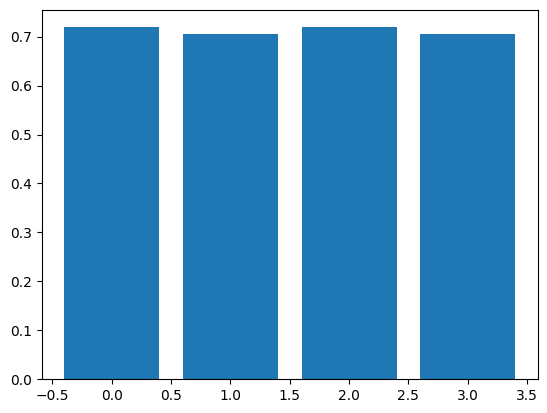

In [56]:
print(models.cv_results_['params'])
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

In [57]:
#not using SMOTE
model = GaussianNB()
model.fit(X_train_T2_scaled, y_train)
y_pred = model.predict(X_test_T2_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T2_scaled)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T2_scaled),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.773972602739726
f1 score on train Dataset:  0.781186478126381
Accuracy on test Dataset:  0.8648648648648649
f1 score on test Dataset:  0.6879606879606879
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.80      0.80      0.80        15
           2       0.80      0.67      0.73        18

    accuracy                           0.70        37
   macro avg       0.63      0.66      0.63        37
weighted avg       0.74      0.70      0.72        37



In [132]:
#using SMOTE
grid = {
    'priors': [None,[0.34,0.33,0.33],[len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train),len(y_train[y_train==[2]])/len(y_train)],[len(y_train[y_train==[2]])/len(y_train),len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train)]]
}
models = GridSearchCV(estimator = GaussianNB(), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_T2_scaled = scaler.fit_transform(X_train_T2)
X_test_T2_scaled = scaler.transform(X_test_T2)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_T2_scaled,y_train)
models.fit(X, y)
print(models.best_params_,models.best_score_)

{'priors': [0.4931506849315068, 0.0958904109589041, 0.410958904109589]} 0.7776955602536998


[{'priors': None}, {'priors': [0.34, 0.33, 0.33]}, {'priors': [0.0958904109589041, 0.410958904109589, 0.4931506849315068]}, {'priors': [0.4931506849315068, 0.0958904109589041, 0.410958904109589]}]


<BarContainer object of 4 artists>

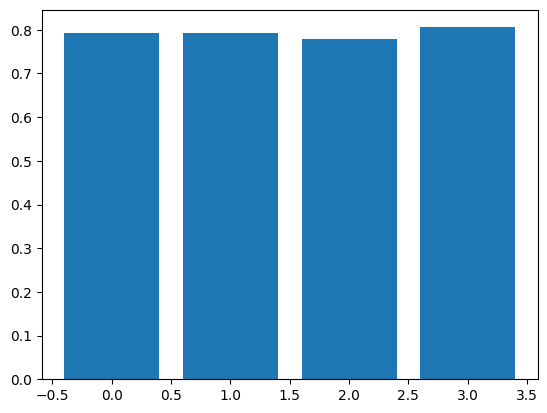

In [60]:
print(models.cv_results_['params'])
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

In [133]:
model = GaussianNB(priors =  [0.4931506849315068, 0.0958904109589041, 0.410958904109589])
model.fit(X, y)
y_pred = model.predict(X_test_T2_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.8194444444444444
f1 score on train Dataset:  0.8191804883569589
Accuracy on test Dataset:  0.7027027027027027
f1 score on test Dataset:  0.6879606879606879
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.80      0.80      0.80        15
           2       0.80      0.67      0.73        18

    accuracy                           0.70        37
   macro avg       0.63      0.66      0.63        37
weighted avg       0.74      0.70      0.72        37



## **SVM for T2 only**

In [63]:
scaler = preprocessing.StandardScaler()
X_train_T2_scaled = scaler.fit_transform(X_train_T2)
X_test_T2_scaled = scaler.transform(X_test_T2)
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,0.01,0.1,0.5],'C': [0.1,1,1.5,10]},
 {'kernel': ['linear'], 'C': [0.1,1,1.5,10]}]
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=kfolds)
svm_model.fit(X_train_T2_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 1.5, 10],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 1.5, 10], 'kernel': ['linear']}])

In [67]:
svm_model.cv_results_['params']

[{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'},
 {'C': 0.1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1.5, 'kernel': 'linear'},
 {'C': 10, 'ke

<BarContainer object of 24 artists>

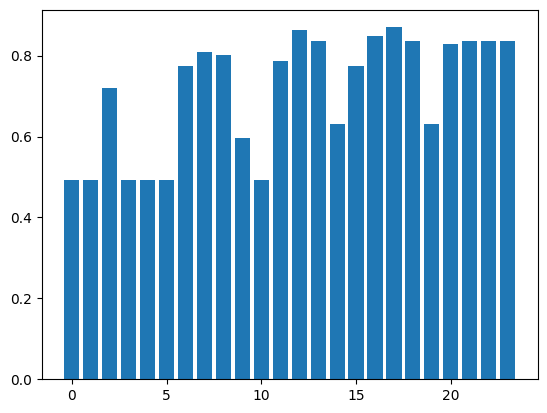

In [68]:
plt.bar(range(len(svm_model.cv_results_['mean_test_score'])),svm_model.cv_results_['mean_test_score'])

In [64]:
print('Best score for training data:', svm_model.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C)
print('Best Kernel:',svm_model.best_estimator_.kernel)
print('Best Gamma:',svm_model.best_estimator_.gamma)
model = svm_model.best_estimator_
y_pred = model.predict(X_test_T2_scaled)

Best score for training data: 0.8701149425287357
Best C: 10
Best Kernel: rbf
Best Gamma: 0.01


In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T2_scaled)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T2_scaled),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8918918918918919
f1 score on test Dataset:  0.8959304131717925
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      0.93      0.97        15
           2       0.89      0.89      0.89        18

    accuracy                           0.89        37
   macro avg       0.83      0.86      0.84        37
weighted avg       0.90      0.89      0.90        37



## **Neural Network for T2 only**

In [70]:
in_dim = len(X_train_T2.columns)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_T2,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test_T2)

In [71]:
accuracies = []
model = NNModel(50,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())

*****Model Accuracy: 88.41% (2.13%)
*****Model Accuracy: 95.82% (1.75%)


*****Model Accuracy: 30.11% (7.96%)
*****Model Accuracy: 91.68% (1.77%)


*****Model Accuracy: 90.75% (3.86%)


*****Model Accuracy: 95.82% (0.95%)
*****Model Accuracy: 29.15% (5.14%)


*****Model Accuracy: 91.21% (1.73%)


In [72]:
print('Accuracies in order:\n',
      '50 Neurons/layer,relu,SGD\n','50 Neurons/layer,relu,Adam,\n','50 Neurons/layer,sigmoid,SGD\n','50 Neurons/layer,sigmoid,Adam,\n','50 Neurons/layer,relu,SGD\n','50 Neurons/layer,relu,Adam,\n','50 Neurons/layer,sigmoid,SGD\n','50 Neurons/layer,sigmoid,Adam,\n')

Accuracies in order:
 50 Neurons/layer,relu,SGD
 50 Neurons/layer,relu,Adam,
 50 Neurons/layer,sigmoid,SGD
 50 Neurons/layer,sigmoid,Adam,
 50 Neurons/layer,relu,SGD
 50 Neurons/layer,relu,Adam,
 50 Neurons/layer,sigmoid,SGD
 50 Neurons/layer,sigmoid,Adam,



<BarContainer object of 8 artists>

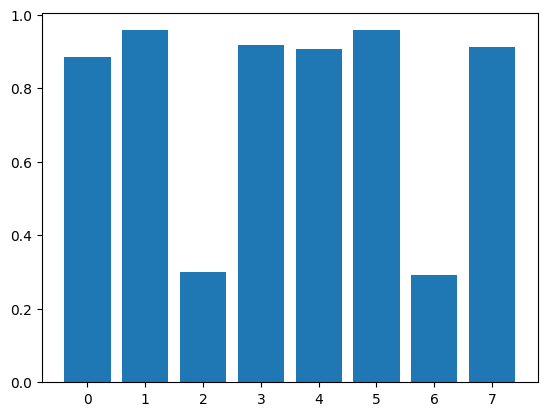

In [73]:
plt.bar(range(len(accuracies)),accuracies)

In [99]:
model = Sequential()
model.add(Dense(100, input_dim = in_dim, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(train_features, pd.get_dummies(y), epochs = 30, batch_size = 16,verbose = 2)
scores = model.evaluate(test_features, pd.get_dummies(data_add_test.iloc[:,0]))
for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))
y_pred = model.predict(test_features).round()
print(metrics.f1_score(y_pred,pd.get_dummies(y_test),average = 'weighted'))
print(metrics.classification_report(pd.DataFrame(y_pred),pd.get_dummies(y_test)))

Epoch 1/30
14/14 - 1s - loss: 0.8533 - accuracy: 0.6806 - 1s/epoch - 104ms/step
Epoch 2/30
14/14 - 0s - loss: 0.4550 - accuracy: 0.8796 - 56ms/epoch - 4ms/step
Epoch 3/30
14/14 - 0s - loss: 0.2788 - accuracy: 0.9306 - 52ms/epoch - 4ms/step
Epoch 4/30
14/14 - 0s - loss: 0.1712 - accuracy: 0.9583 - 49ms/epoch - 3ms/step
Epoch 5/30
14/14 - 0s - loss: 0.0956 - accuracy: 0.9861 - 62ms/epoch - 4ms/step
Epoch 6/30
14/14 - 0s - loss: 0.0607 - accuracy: 0.9907 - 50ms/epoch - 4ms/step
Epoch 7/30
14/14 - 0s - loss: 0.0339 - accuracy: 0.9907 - 46ms/epoch - 3ms/step
Epoch 8/30
14/14 - 0s - loss: 0.0210 - accuracy: 1.0000 - 48ms/epoch - 3ms/step
Epoch 9/30
14/14 - 0s - loss: 0.0136 - accuracy: 1.0000 - 42ms/epoch - 3ms/step
Epoch 10/30
14/14 - 0s - loss: 0.0096 - accuracy: 1.0000 - 96ms/epoch - 7ms/step
Epoch 11/30
14/14 - 0s - loss: 0.0071 - accuracy: 1.0000 - 103ms/epoch - 7ms/step
Epoch 12/30
14/14 - 0s - loss: 0.0052 - accuracy: 1.0000 - 113ms/epoch - 8ms/step
Epoch 13/30
14/14 - 0s - loss: 0.00

2/2 [==============================] - 1s 15ms/step - loss: 0.4736 - accuracy: 0.8378

loss: 0.474

accuracy: 0.838
2/2 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.93      0.93      0.93        15
           2       0.78      1.00      0.88        14

   micro avg       0.84      0.84      0.84        37
   macro avg       0.82      0.77      0.77        37
weighted avg       0.83      0.84      0.82        37
 samples avg       0.84      0.84      0.84        37



## **Random Forest for T2 only**

In [75]:
grid = {
    'criterion':["squared_error","absolute_error"],
    'max_depth': [2,3,5,7,10],
    'max_features': [3,10,"sqrt"],
    'n_estimators':[50,100,150]
}
model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= kfolds)
X, y = oversample.fit_resample(X_train_T2,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
model.fit(train_features, y)
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [76]:
model.cv_results_['params']

[{'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 3,
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 10,
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 150},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 3,
  'n_estimators': 50},
 {'criterion': 'squared_error',
  'm

<BarContainer object of 90 artists>

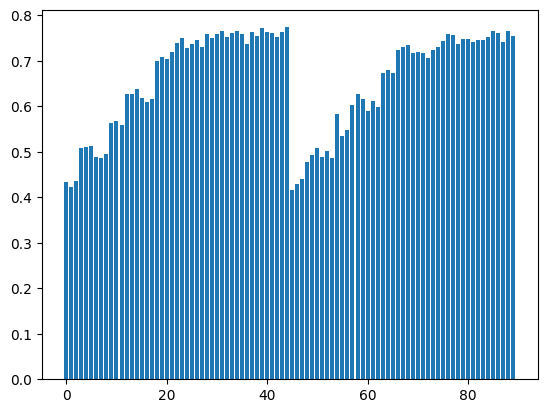

In [77]:
plt.bar(range(len(model.cv_results_['mean_test_score'])),model.cv_results_['mean_test_score'])

In [78]:
model = RandomForestRegressor(criterion = 'squared_error',max_depth = 10,max_features = "sqrt",n_estimators = 150)
X, y = oversample.fit_resample(X_train_T2,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test_T2)
model.fit(train_features, y)
y_pred = model.predict(test_features)
accuracy = metrics.accuracy_score(y_test, [round(i) for i in y_pred])
f1 = metrics.f1_score(y_test,[round(i) for i in y_pred], average='weighted')
print("Accuracy on Train dataset:", metrics.accuracy_score(y, [round(i) for i in model.predict(train_features)]))
print("F1 on Train dataset:", metrics.f1_score(y, [round(i) for i in model.predict(train_features)],average = 'weighted'))
print("Accuracy on Test dataset:", accuracy)
print("F1 on Test dataset:", f1)
print(metrics.classification_report(y_test,  [round(i) for i in y_pred]))

Accuracy on Train dataset: 0.9861111111111112
F1 on Train dataset: 0.9861050803300043
Accuracy on Test dataset: 0.7837837837837838
F1 on Test dataset: 0.7713210663974671
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.65      1.00      0.79        15
           2       1.00      0.72      0.84        18

    accuracy                           0.78        37
   macro avg       0.88      0.66      0.68        37
weighted avg       0.86      0.78      0.77        37



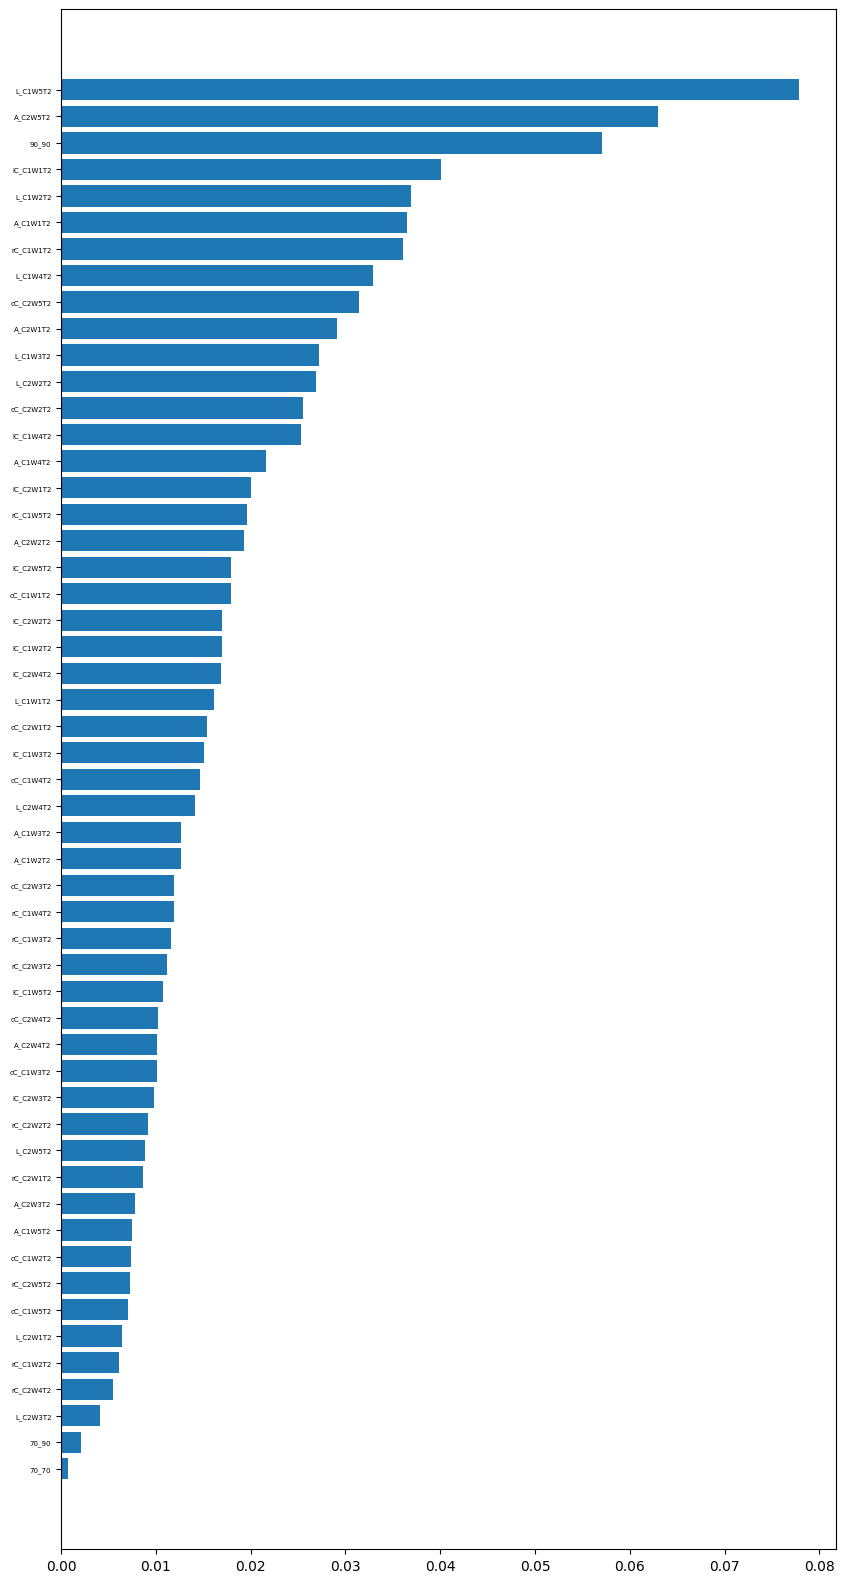

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T2.columns)[indices])

## **Logsitic for T2 only**

In [45]:
grid = {
    'penalty': ['l1', 'l2'],
    'C':[0.5,1,1.5],
    'tol':[0.0001,0.001,0.01,0.1]
}
models = GridSearchCV(estimator=LogisticRegression(solver = 'liblinear',multi_class = 'ovr'), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_T2_scaled = scaler.fit_transform(X_train_T2)
X_test_T2_scaled = scaler.transform(X_test_T2)
X, y = oversample.fit_resample(X_train_T2_scaled,y_train)
models.fit(X, y)
models.best_params_

{'C': 1.5, 'penalty': 'l1', 'tol': 0.0001}

In [46]:
models.cv_results_['params']

[{'C': 0.5, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.001},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.01},
 {'C': 0.5, 'penalty': 'l1', 'tol': 0.1},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.001},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.01},
 {'C': 0.5, 'penalty': 'l2', 'tol': 0.1},
 {'C': 1, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 1, 'penalty': 'l1', 'tol': 0.001},
 {'C': 1, 'penalty': 'l1', 'tol': 0.01},
 {'C': 1, 'penalty': 'l1', 'tol': 0.1},
 {'C': 1, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 1, 'penalty': 'l2', 'tol': 0.001},
 {'C': 1, 'penalty': 'l2', 'tol': 0.01},
 {'C': 1, 'penalty': 'l2', 'tol': 0.1},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.0001},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.001},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.01},
 {'C': 1.5, 'penalty': 'l1', 'tol': 0.1},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.0001},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.001},
 {'C': 1.5, 'penalty': 'l2', 'tol': 0.01},
 {'C': 1.5, 'p

<BarContainer object of 24 artists>

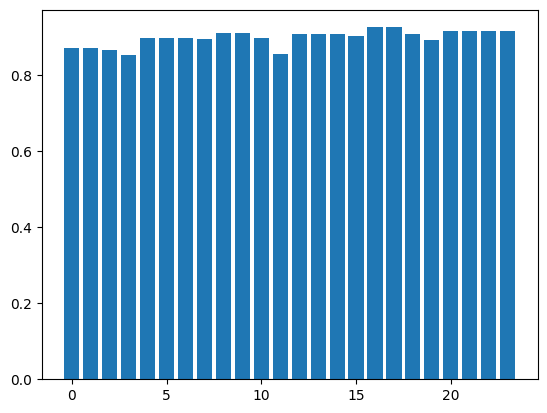

In [47]:
plt.bar(range(len(models.cv_results_['mean_test_score'])),models.cv_results_['mean_test_score'])

Accuracy on train Dataset:  0.9861111111111112
f1 score on train Dataset:  0.9860785128026507
Accuracy on test Dataset:  0.918918918918919
f1 score on test Dataset:  0.9262899262899263
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      1.00      1.00        15
           2       1.00      0.83      0.91        18

    accuracy                           0.92        37
   macro avg       0.86      0.94      0.88        37
weighted avg       0.95      0.92      0.93        37



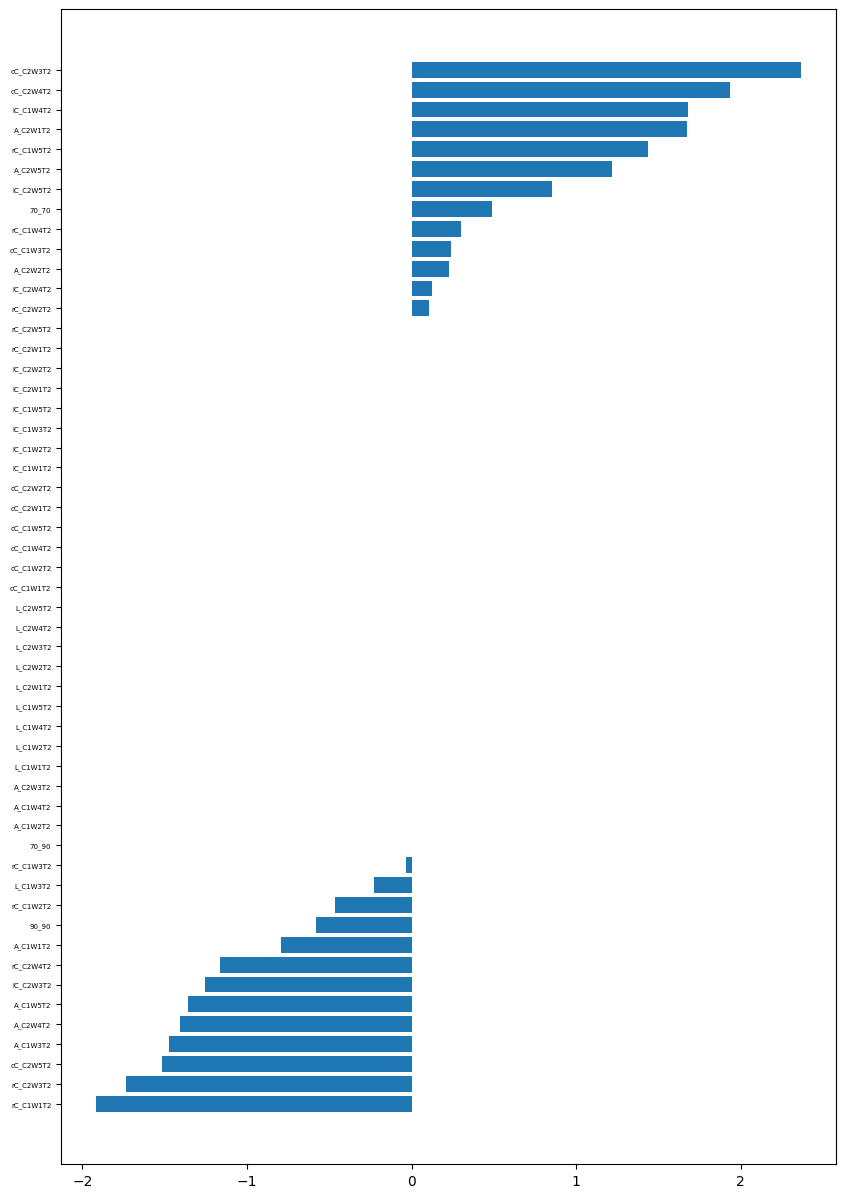

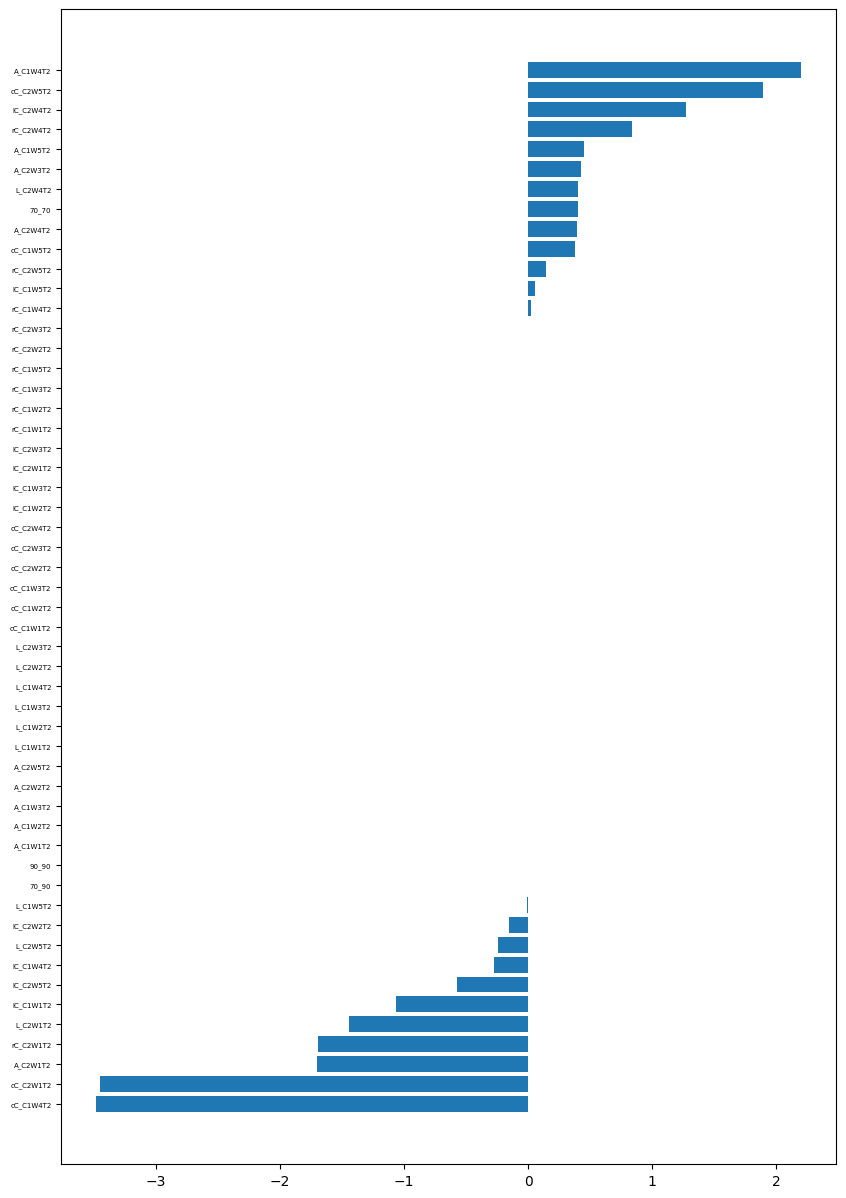

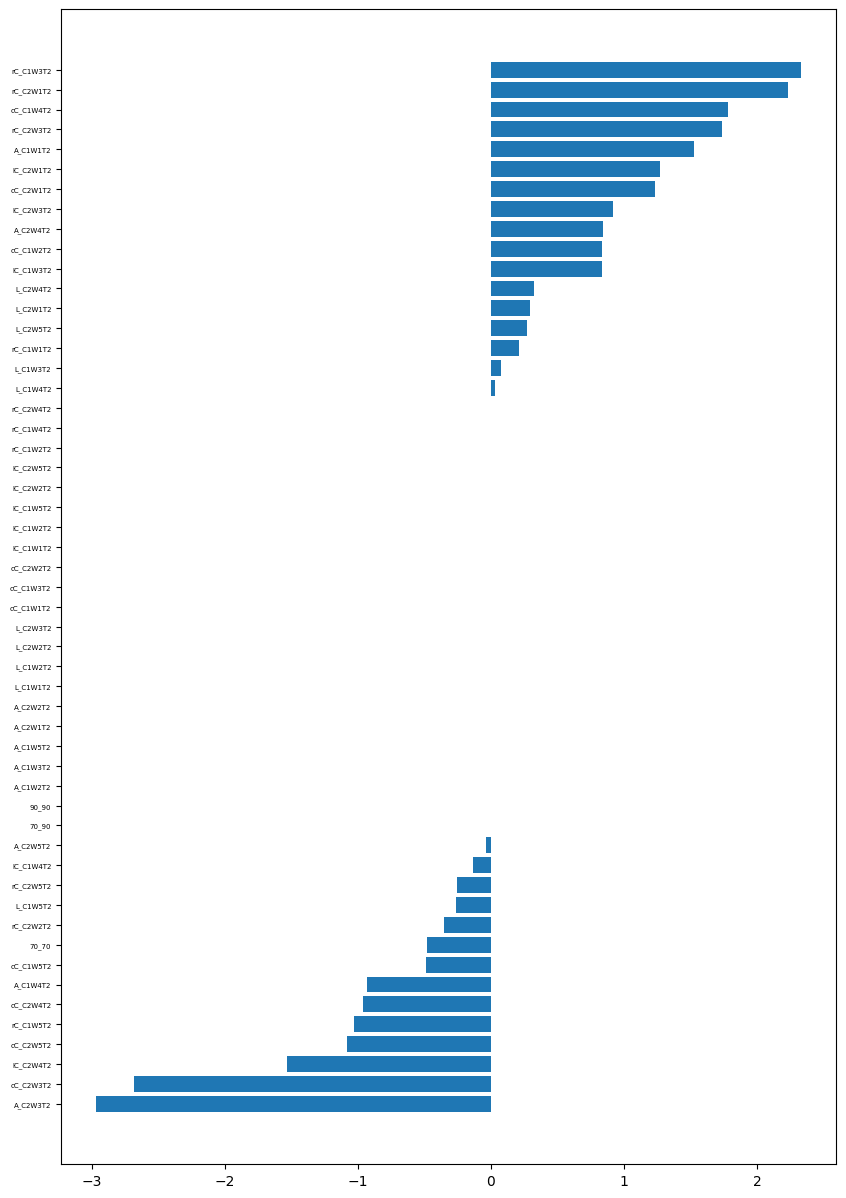

In [49]:
model = LogisticRegression(solver = 'liblinear',multi_class = 'ovr', C = 1.5, penalty = 'l1', tol = 0.0001)
model.fit(X, y)
y_pred = model.predict(X_test_T2_scaled)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

#plot the vairable importances

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(10,15))
    plt.barh(range(len(names)), imp, align='center')
    plt.tick_params(axis='y', labelsize=5)
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(model.coef_[0], X_train_T2.columns)
f_importances(model.coef_[1], X_train_T2.columns)
f_importances(model.coef_[2], X_train_T2.columns)

## *What happens if only using T0?*
## *do the same steps/algorithms as above using T0 variables only*

In [51]:
X_train_T0 = X_train.iloc[:,:53]
X_test_T0 = X_test.iloc[:,:53]

## **XGboost for T0 only**

In [126]:
grid = {
    'max_depth': [2,4,6,9],
    'n_estimators':[50,100,150],
    'learning_rate':[0.3,0.5,1],
    'reg_alpha':[0,0.01,0.1,0.5],
    'reg_lambda':[0,0.1,1]
}
models = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_T0, y_train)
models.best_params_

{'learning_rate': 1,
 'max_depth': 6,
 'n_estimators': 50,
 'reg_alpha': 0,
 'reg_lambda': 1}

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8378378378378378
f1 score on test Dataset:  0.8213642213642214
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.92      0.80      0.86        15
           2       0.82      1.00      0.90        18

    accuracy                           0.84        37
   macro avg       0.75      0.68      0.70        37
weighted avg       0.83      0.84      0.82        37



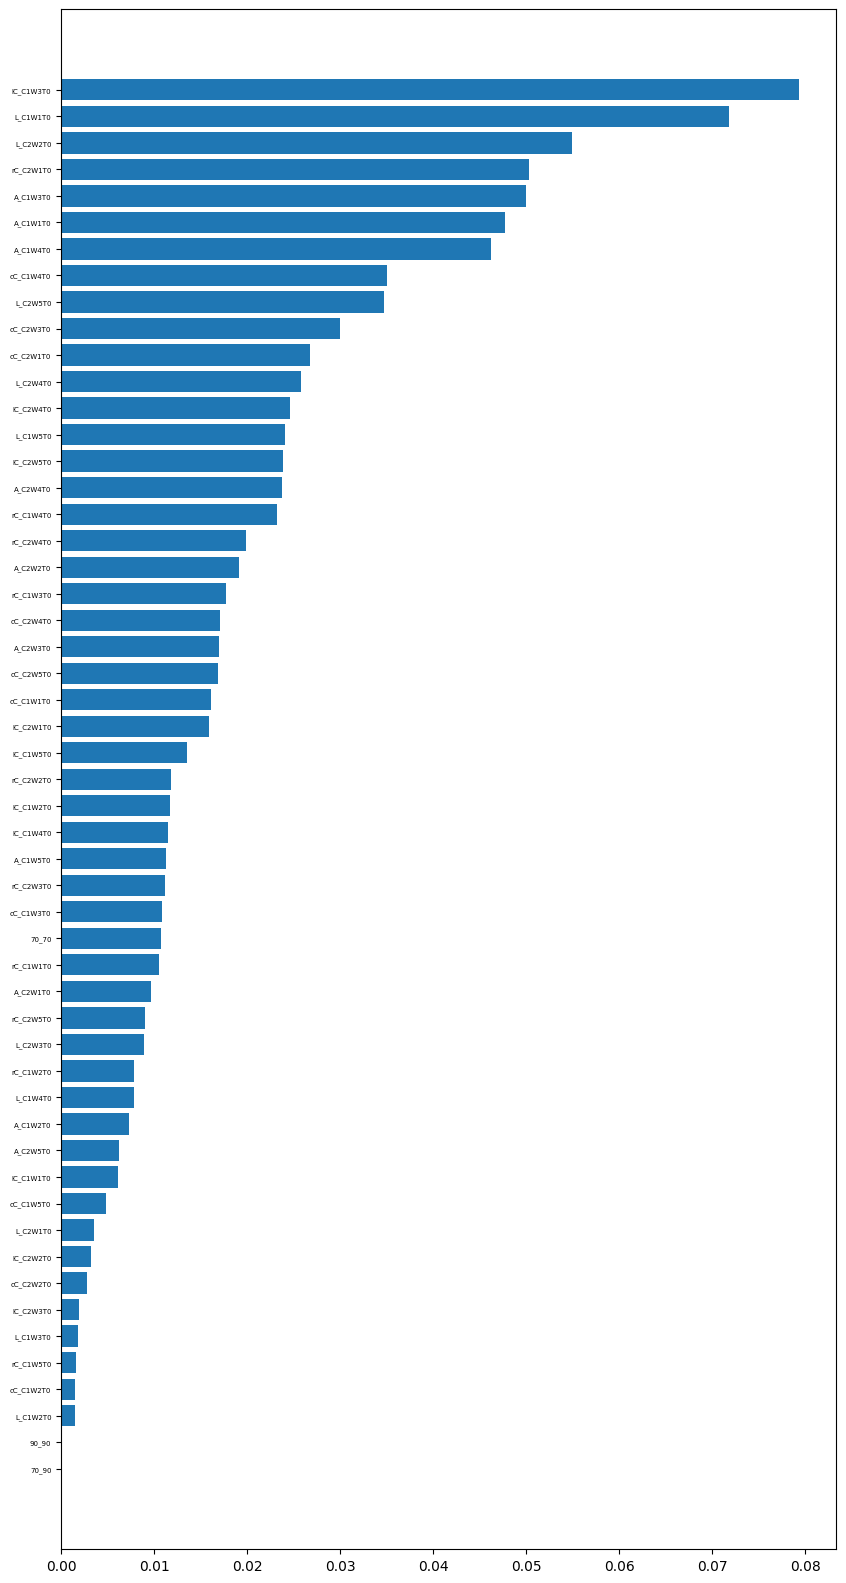

In [127]:
model = XGBClassifier(max_depth = 6,learning_rate = 0.5, n_estimators= 100,reg_alpha = 0,reg_lambda = 1)
model.fit(X_train_T0, y_train)
y_pred = model.predict(X_test_T0)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T0)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T0),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T0.columns)[indices])

## **Adaboost for T0 only**

In [109]:
grid = {
    'algorithm': ["SAMME","SAMME.R"],
    'n_estimators':[10,30,50,70,100,150],
    'learning_rate':[0.5,1,1.5,2]
}
models = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_T0, y_train)
print(models.best_params_,models.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100} 0.6098850574712643


Accuracy on train Dataset:  0.8287671232876712
f1 score on train Dataset:  0.8288666462881475
Accuracy on test Dataset:  0.5945945945945946
f1 score on test Dataset:  0.5840323081702392
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.53      0.55        15
           2       0.62      0.72      0.67        18

    accuracy                           0.59        37
   macro avg       0.56      0.50      0.52        37
weighted avg       0.59      0.59      0.58        37



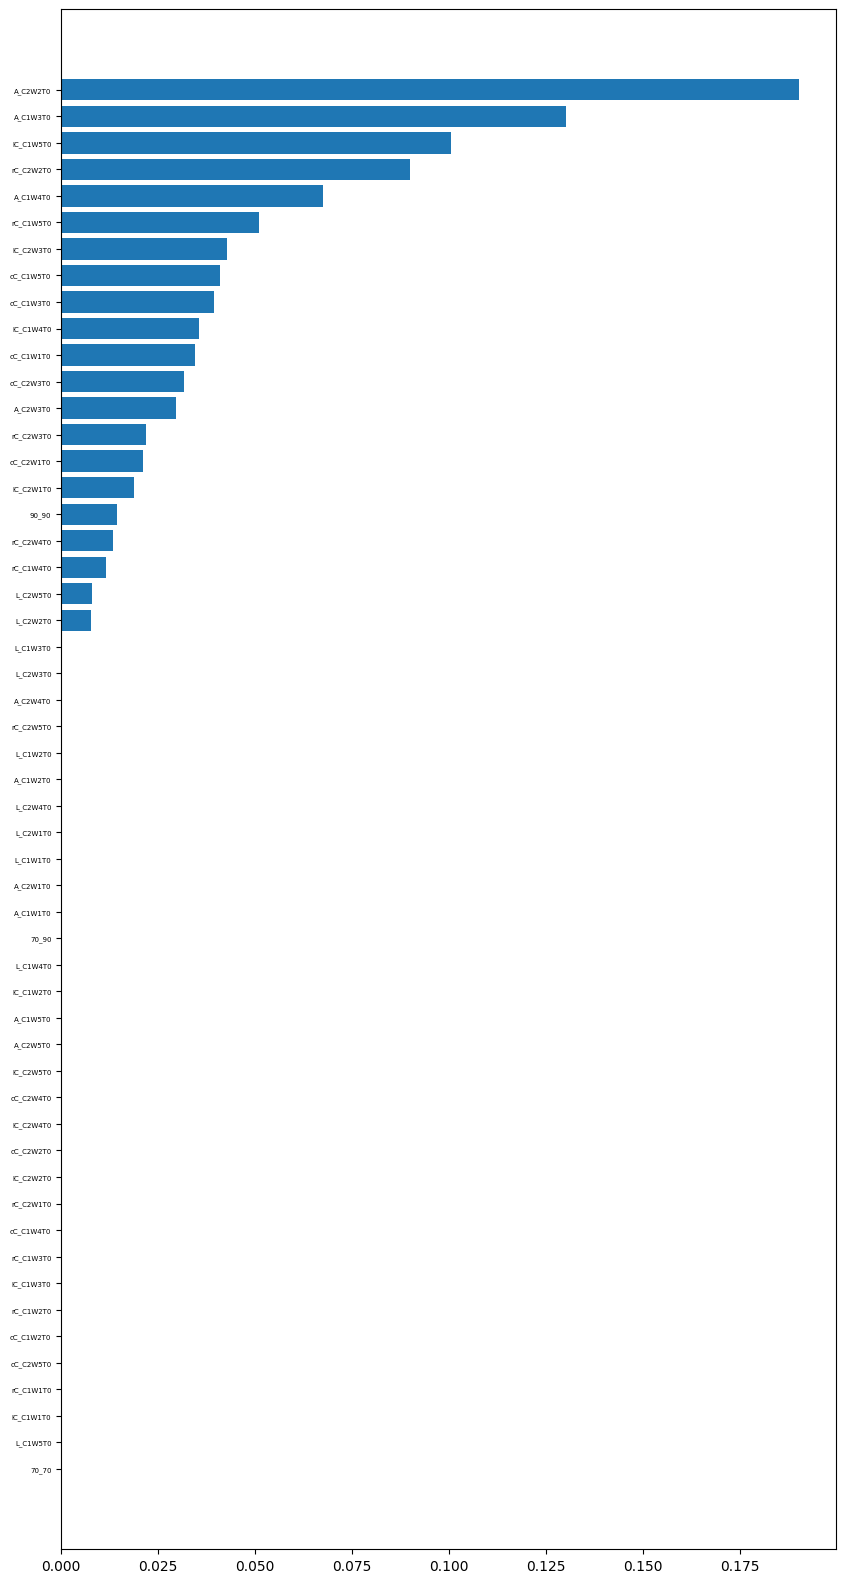

In [110]:
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.5, n_estimators= 100)
model.fit(X_train_T0, y_train)
y_pred = model.predict(X_test_T0)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T0)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T0),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_T0.columns)[indices])

## **Gaussian NB for T0 only**

In [129]:
#using oversampling and scaling
grid = {
    'priors': [None,[0.34,0.33,0.33],[len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train),len(y_train[y_train==[2]])/len(y_train)],[len(y_train[y_train==[2]])/len(y_train),len(y_train[y_train==[0]])/len(y_train),len(y_train[y_train==[1]])/len(y_train)]]
}
models = GridSearchCV(estimator = GaussianNB(), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_T0_scaled = scaler.fit_transform(X_train_T0)
X_test_T0_scaled = scaler.transform(X_test_T0)
X, y = oversample.fit_resample(X_train_T0_scaled,y_train)
models.fit(X, y)
print(models.best_params_,models.best_score_)

{'priors': [0.4931506849315068, 0.0958904109589041, 0.410958904109589]} 0.6669133192389006


In [131]:
model = GaussianNB(priors =  [0.4931506849315068, 0.0958904109589041, 0.410958904109589])
model.fit(X, y)
y_pred = model.predict(X_test_T0_scaled)
accuracy = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test,average="weighted")
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  0.7175925925925926
f1 score on train Dataset:  0.7068821664402013
Accuracy on test Dataset:  0.43243243243243246
f1 score on test Dataset:  0.46159317211948797
              precision    recall  f1-score   support

           0       0.25      0.75      0.38         4
           1       0.40      0.13      0.20        15
           2       0.55      0.61      0.58        18

    accuracy                           0.43        37
   macro avg       0.40      0.50      0.38        37
weighted avg       0.46      0.43      0.40        37



## **SVM for T0 only**

In [113]:
scaler = preprocessing.StandardScaler()
X_train_T0_scaled = scaler.fit_transform(X_train_T0)
X_test_T0_scaled = scaler.transform(X_test_T0)
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,0.01,0.1,0.5],'C': [0.1,1,1.5,10]},
 {'kernel': ['linear'], 'C': [0.1,1,1.5,10]}]
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=kfolds)
svm_model.fit(X_train_T0_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 1.5, 10],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 1.5, 10], 'kernel': ['linear']}])

In [116]:
print('Best score for training data:', svm_model.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C)
print('Best Kernel:',svm_model.best_estimator_.kernel)
print('Best Gamma:',svm_model.best_estimator_.gamma)
model = svm_model.best_estimator_
y_pred = model.predict(X_test_T0_scaled)

Best score for training data: 0.7537931034482759
Best C: 1.5
Best Kernel: rbf
Best Gamma: 0.1


In [117]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_T0_scaled)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_T0_scaled),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.7297297297297297
f1 score on test Dataset:  0.6847826086956521
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.60      0.75        15
           2       0.64      1.00      0.78        18

    accuracy                           0.73        37
   macro avg       0.55      0.53      0.51        37
weighted avg       0.72      0.73      0.68        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Neural Network for T0 only**

In [118]:
in_dim = len(X_train_T0.columns)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_T0,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test_T0)

In [119]:
accuracies = []
model = NNModel(50,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(50,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'relu','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','SGD')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())
model = NNModel(100,3,'sigmoid','Adam')
estimator = KerasClassifier(model, epochs=30, batch_size=16, verbose=0)
results = cross_val_score(estimator, train_features, pd.get_dummies(y), cv=kfolds)
print("*****Model Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
accuracies.append(results.mean())

*****Model Accuracy: 78.73% (4.80%)
*****Model Accuracy: 91.23% (3.63%)


*****Model Accuracy: 33.83% (11.61%)
*****Model Accuracy: 74.08% (5.74%)


*****Model Accuracy: 78.72% (4.65%)
*****Model Accuracy: 87.52% (3.71%)


*****Model Accuracy: 33.83% (12.42%)
*****Model Accuracy: 74.10% (5.61%)


In [123]:
model = Sequential()
#show the prunning by change #nodes, activ function,optimizer(opt/adam)
model.add(Dense(50, input_dim = in_dim, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(train_features, pd.get_dummies(y), epochs = 30, batch_size = 16,verbose = 2)
scores = model.evaluate(test_features, pd.get_dummies(y_test))
for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))
y_pred = model.predict(test_features).round()
metrics.f1_score(y_pred,pd.get_dummies(y_test),average = 'weighted')
print(metrics.classification_report(pd.DataFrame(y_pred),pd.get_dummies(y_test)))

Epoch 1/30
14/14 - 1s - loss: 1.1265 - accuracy: 0.4120 - 1s/epoch - 96ms/step
Epoch 2/30
14/14 - 0s - loss: 0.8952 - accuracy: 0.6806 - 45ms/epoch - 3ms/step
Epoch 3/30
14/14 - 0s - loss: 0.7355 - accuracy: 0.7315 - 49ms/epoch - 3ms/step
Epoch 4/30
14/14 - 0s - loss: 0.5960 - accuracy: 0.7963 - 55ms/epoch - 4ms/step
Epoch 5/30
14/14 - 0s - loss: 0.4943 - accuracy: 0.8241 - 59ms/epoch - 4ms/step
Epoch 6/30
14/14 - 0s - loss: 0.4014 - accuracy: 0.8935 - 50ms/epoch - 4ms/step
Epoch 7/30
14/14 - 0s - loss: 0.3298 - accuracy: 0.8935 - 52ms/epoch - 4ms/step
Epoch 8/30
14/14 - 0s - loss: 0.2700 - accuracy: 0.9352 - 44ms/epoch - 3ms/step
Epoch 9/30
14/14 - 0s - loss: 0.2126 - accuracy: 0.9491 - 51ms/epoch - 4ms/step
Epoch 10/30
14/14 - 0s - loss: 0.1673 - accuracy: 0.9722 - 41ms/epoch - 3ms/step
Epoch 11/30
14/14 - 0s - loss: 0.1374 - accuracy: 0.9815 - 53ms/epoch - 4ms/step
Epoch 12/30
14/14 - 0s - loss: 0.1060 - accuracy: 0.9861 - 46ms/epoch - 3ms/step
Epoch 13/30
14/14 - 0s - loss: 0.0814 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Random Forest for T0 only**

In [124]:
grid = {
    'criterion':["squared_error","absolute_error"],
    'max_depth': [2,3,5,7,10],
    'max_features': [3,10,"sqrt"],
    'n_estimators':[50,100,150]
}
model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= kfolds)
X, y = oversample.fit_resample(X_train_T0,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
model.fit(train_features, y)
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [125]:
model = RandomForestRegressor(criterion = 'squared_error',max_depth = 7,max_features = "sqrt",n_estimators = 100)
X, y = oversample.fit_resample(X_train_T0,y_train)
scaler = preprocessing.StandardScaler()
train_features = scaler.fit_transform(X)
test_features = scaler.transform(X_test_T0)
model.fit(train_features, y)
y_pred = model.predict(test_features)
accuracy = metrics.accuracy_score(y_test, [round(i) for i in y_pred])
f1 = metrics.f1_score(y_test,[round(i) for i in y_pred], average='weighted')
print("Accuracy on Train dataset:", metrics.accuracy_score(y, [round(i) for i in model.predict(train_features)]))
print("F1 on Train dataset:", metrics.f1_score(y, [round(i) for i in model.predict(train_features)],average = 'weighted'))
print("Accuracy on Test dataset:", accuracy)
print("F1 on Test dataset:", f1)
print(metrics.classification_report(y_test,  [round(i) for i in y_pred]))

Accuracy on Train dataset: 0.9861111111111112
F1 on Train dataset: 0.9861104412828551
Accuracy on Test dataset: 0.7567567567567568
F1 on Test dataset: 0.7198712360002683
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.62      1.00      0.77        15
           2       1.00      0.72      0.84        18

    accuracy                           0.76        37
   macro avg       0.54      0.57      0.54        37
weighted avg       0.74      0.76      0.72        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Logistic for T0 only**

In [52]:
grid = {
    'penalty': ['l1', 'l2'],
    'C':[0.5,1,1.5],
    'tol':[0.0001,0.001,0.01,0.1]
}
models = GridSearchCV(estimator=LogisticRegression(solver = 'liblinear',multi_class = 'ovr'), param_grid=grid, cv= kfolds)
scaler = preprocessing.StandardScaler()
X_train_T0_scaled = scaler.fit_transform(X_train_T0)
X_test_T0_scaled = scaler.transform(X_test_T0)
X, y = oversample.fit_resample(X_train_T0_scaled,y_train)
models.fit(X, y)
models.best_params_

{'C': 1, 'penalty': 'l2', 'tol': 0.0001}

Accuracy on train Dataset:  0.8888888888888888
f1 score on train Dataset:  0.8876664195813133
Accuracy on test Dataset:  0.6756756756756757
f1 score on test Dataset:  0.6797082797082797
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.67      0.67      0.67        15
           2       0.76      0.72      0.74        18

    accuracy                           0.68        37
   macro avg       0.61      0.63      0.62        37
weighted avg       0.69      0.68      0.68        37



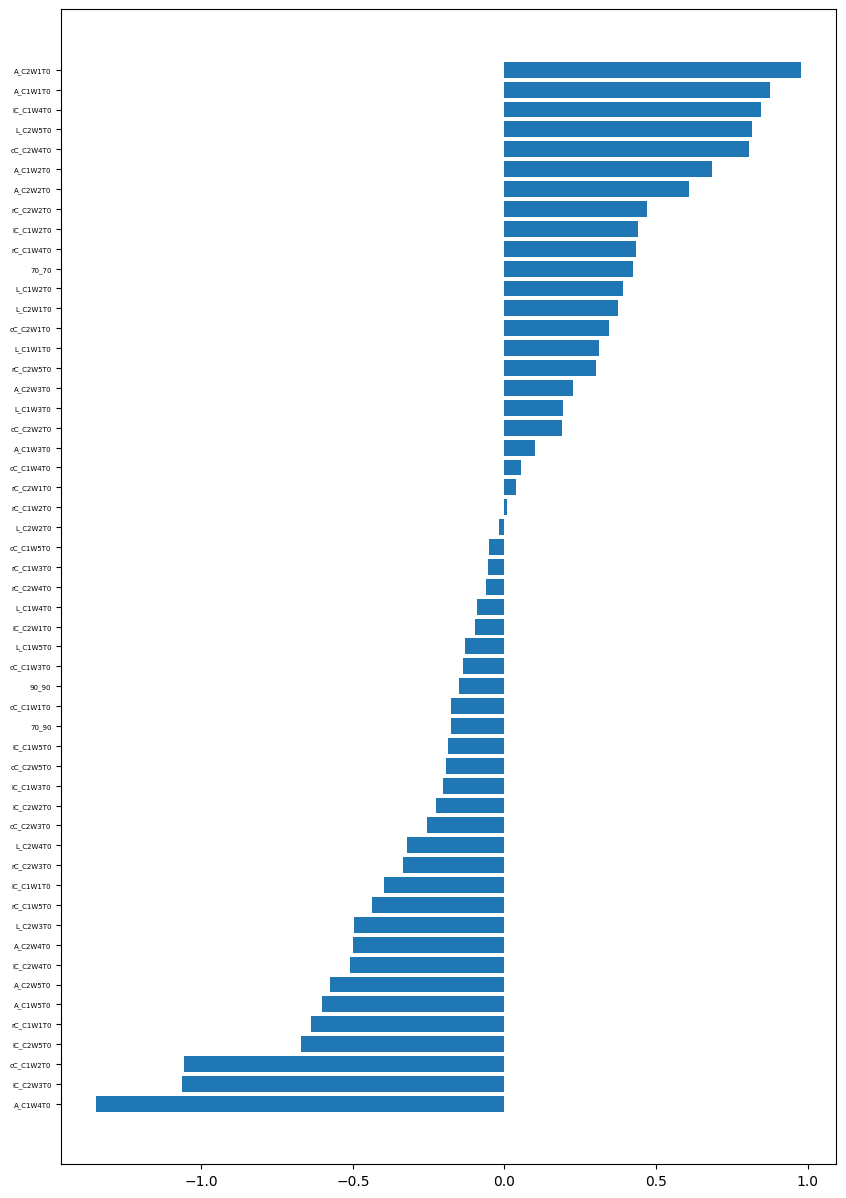

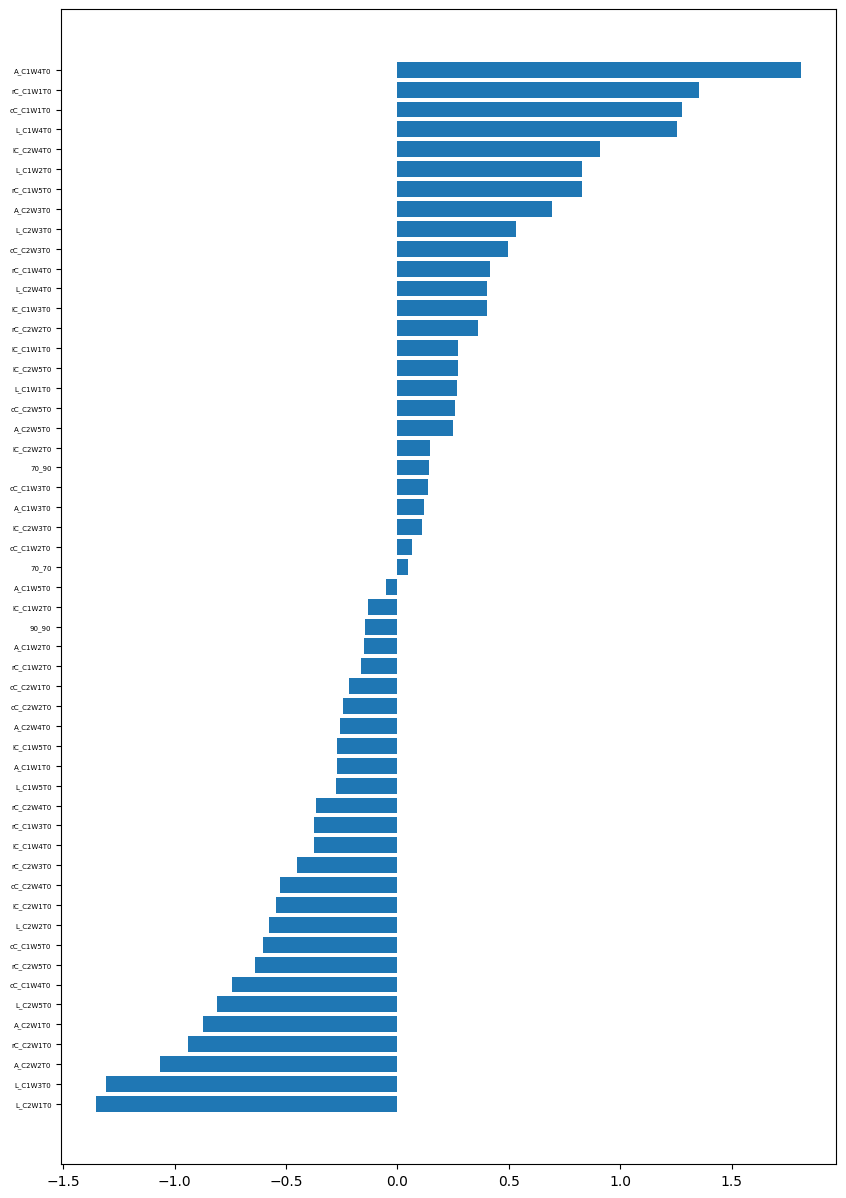

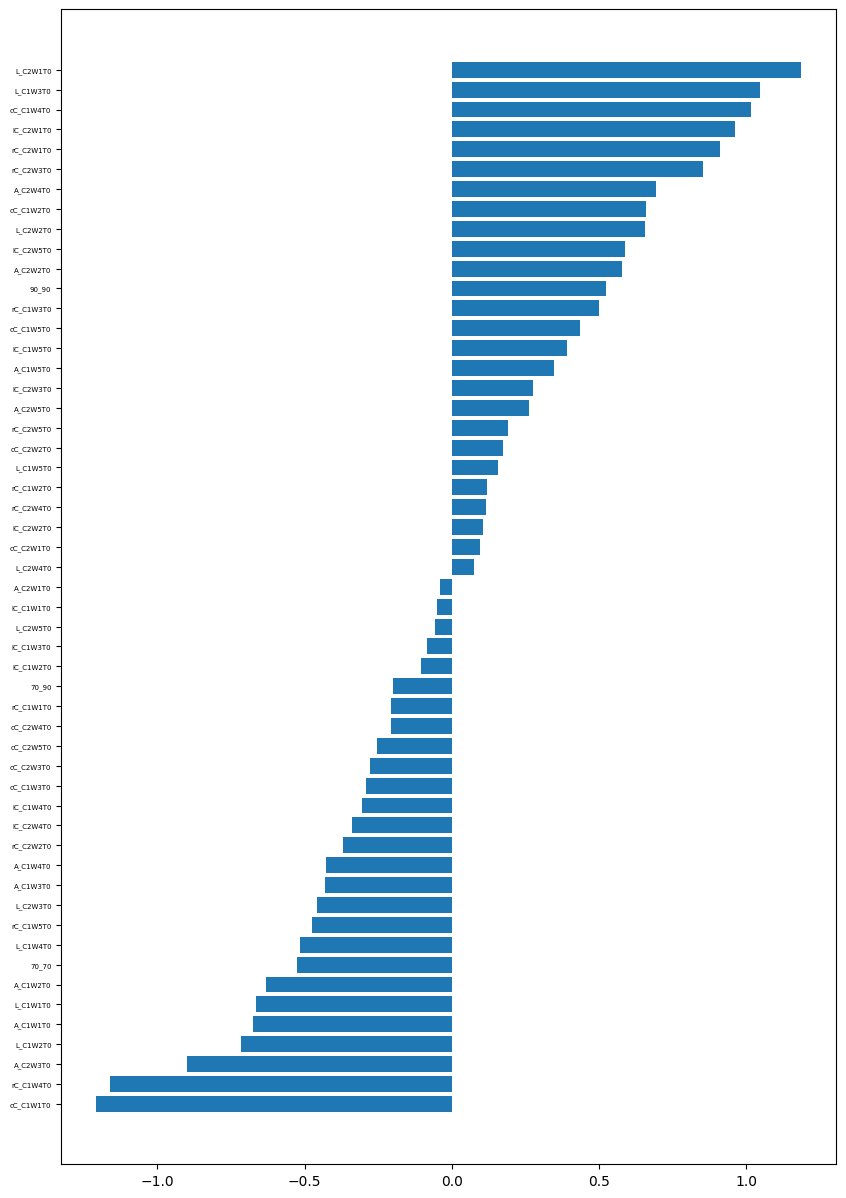

In [53]:
model = LogisticRegression(solver = 'liblinear',multi_class = 'ovr', C = 1, penalty = 'l2', tol = 0.0001)
model.fit(X, y)
y_pred = model.predict(X_test_T0_scaled)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y, model.predict(X)))
print("f1 score on train Dataset: ",metrics.f1_score(y, model.predict(X),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))

#plot the variable importances

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    # fig, ax = plt.subplots(figsize=(10,15))
    # ax.barh(range(len(names)), imp,align = 'center')
    # ax.tick_params(axis='y', labelsize=8)
    # _ = ax.set_yticklabels(names)
    plt.figure(figsize=(10,15))
    plt.barh(range(len(names)), imp, align='center')
    plt.tick_params(axis='y', labelsize=5)
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(model.coef_[0], X_train_T0.columns)
f_importances(model.coef_[1], X_train_T0.columns)
f_importances(model.coef_[2], X_train_T0.columns)

# *What happens to scramble/oob some important variables shown in the previous plot?*
# *Scramble and OOB A_C2W1T2 and compare results for XGBoost and Adaboost*

In [156]:
X_train_scramble = pd.concat([pd.DataFrame(X_train.iloc[:,:54]).reset_index(drop=True),pd.DataFrame(X_train['A_C2W1T2'].sample(frac=1)).reset_index(drop=True),pd.DataFrame(X_train.iloc[:,55:]).reset_index(drop=True)],axis=1)
X_train_oob = X_train.loc[:, X_train.columns != 'A_C2W1T2']
X_test_oob = X_test.loc[:, X_test.columns != 'A_C2W1T2']

## **XGboost for Scramble(using all other variables)**

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8918918918918919
f1 score on test Dataset:  0.8845720720720722
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.88      1.00      0.94        15
           2       0.89      0.89      0.89        18

    accuracy                           0.89        37
   macro avg       0.92      0.80      0.83        37
weighted avg       0.90      0.89      0.88        37



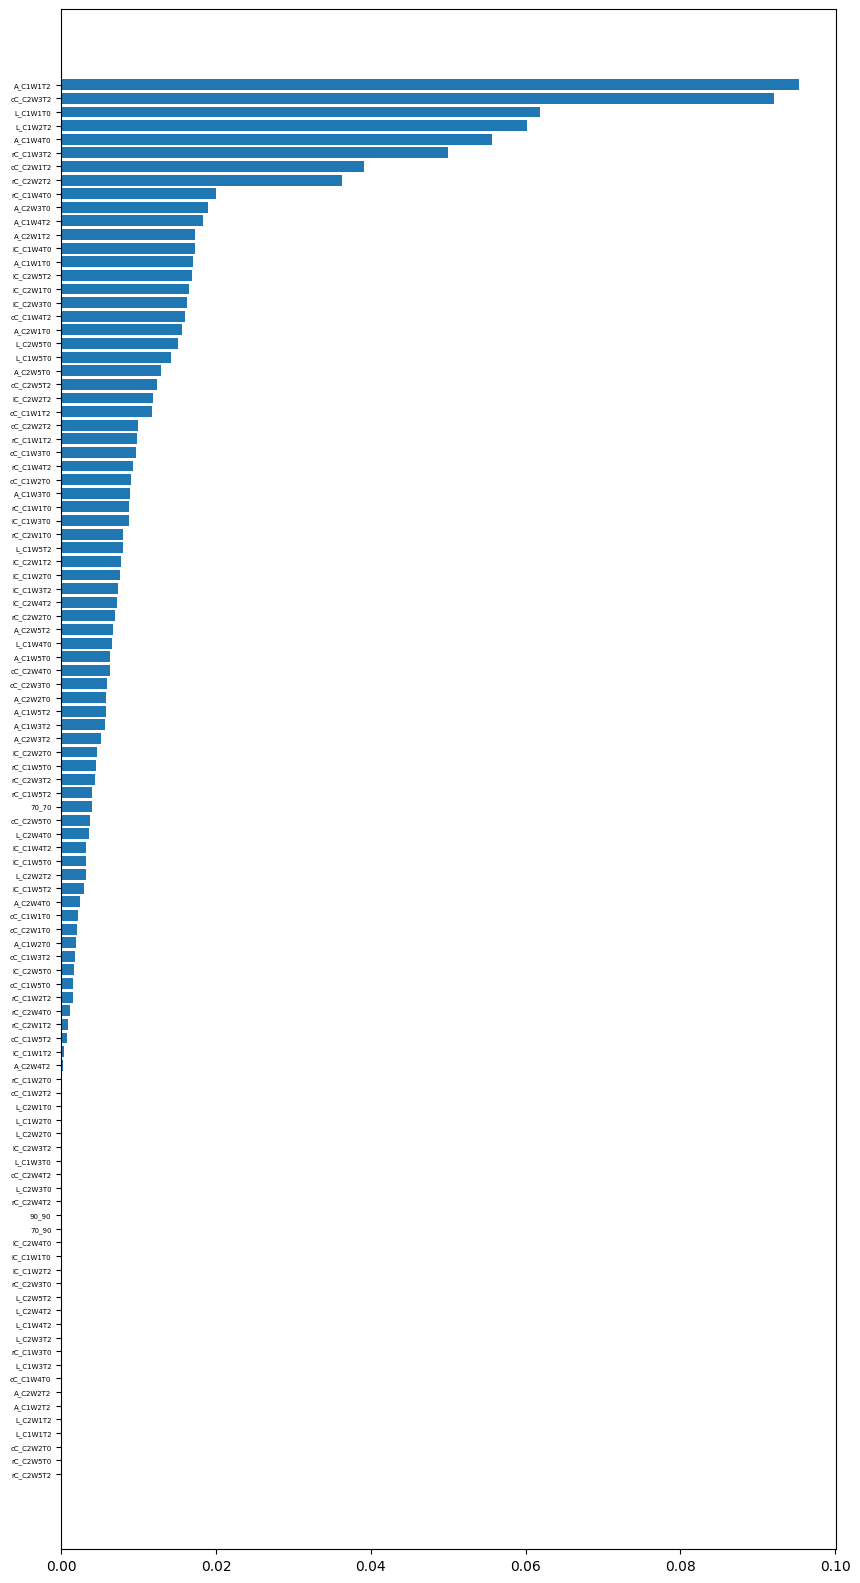

In [158]:
model = XGBClassifier()
model.fit(X_train_scramble, y_train)
y_pred = model.predict(X_test)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_scramble)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_scramble),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_scramble.columns)[indices])

## **XGboost for OOB(using all other variables)**

Accuracy on train Dataset:  1.0
f1 score on train Dataset:  1.0
Accuracy on test Dataset:  0.8918918918918919
f1 score on test Dataset:  0.8845720720720722
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.88      1.00      0.94        15
           2       0.89      0.89      0.89        18

    accuracy                           0.89        37
   macro avg       0.92      0.80      0.83        37
weighted avg       0.90      0.89      0.88        37



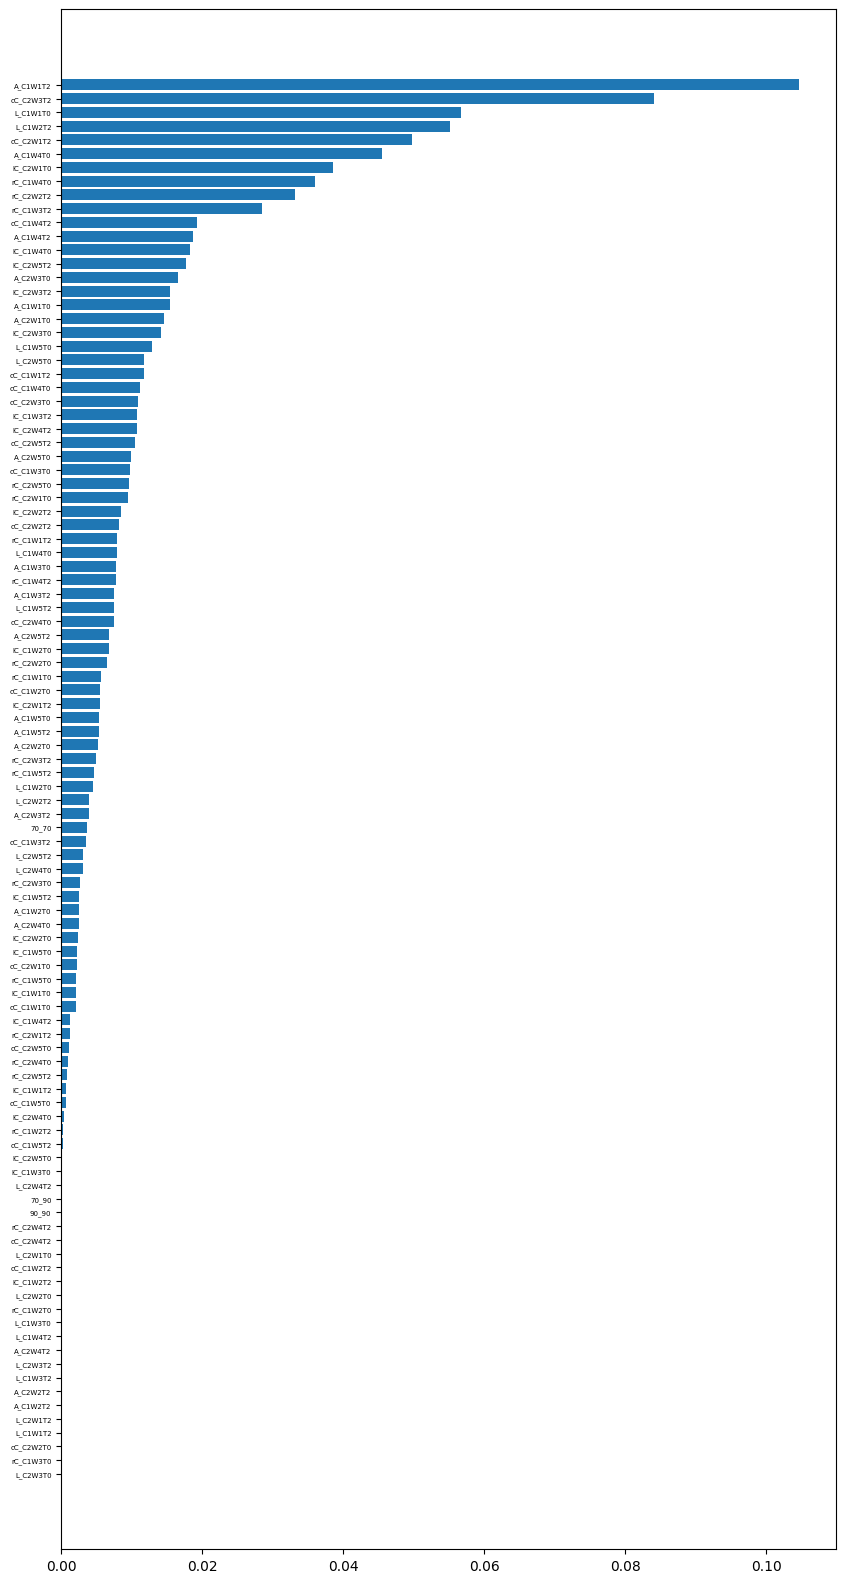

In [159]:
model = XGBClassifier()
model.fit(X_train_oob, y_train)
y_pred = model.predict(X_test_oob)
accuracy  = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_oob)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_oob),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_oob.columns)[indices])

## **Adaboost for Scramble(using all other variables)**

In [161]:
grid = {
    'algorithm': ["SAMME","SAMME.R"],
    'n_estimators':[10,30,50,70,100,150],
    'learning_rate':[0.5,1,1.5,2]
}
models = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_scramble, y_train)
print(models.best_params_,models.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70} 0.8427586206896553


Accuracy on train Dataset:  0.9931506849315068
f1 score on train Dataset:  0.9931550392322497
Accuracy on test Dataset:  0.9459459459459459
f1 score on test Dataset:  0.9444513638062025
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        15
           2       0.94      0.94      0.94        18

    accuracy                           0.95        37
   macro avg       0.96      0.90      0.92        37
weighted avg       0.95      0.95      0.94        37



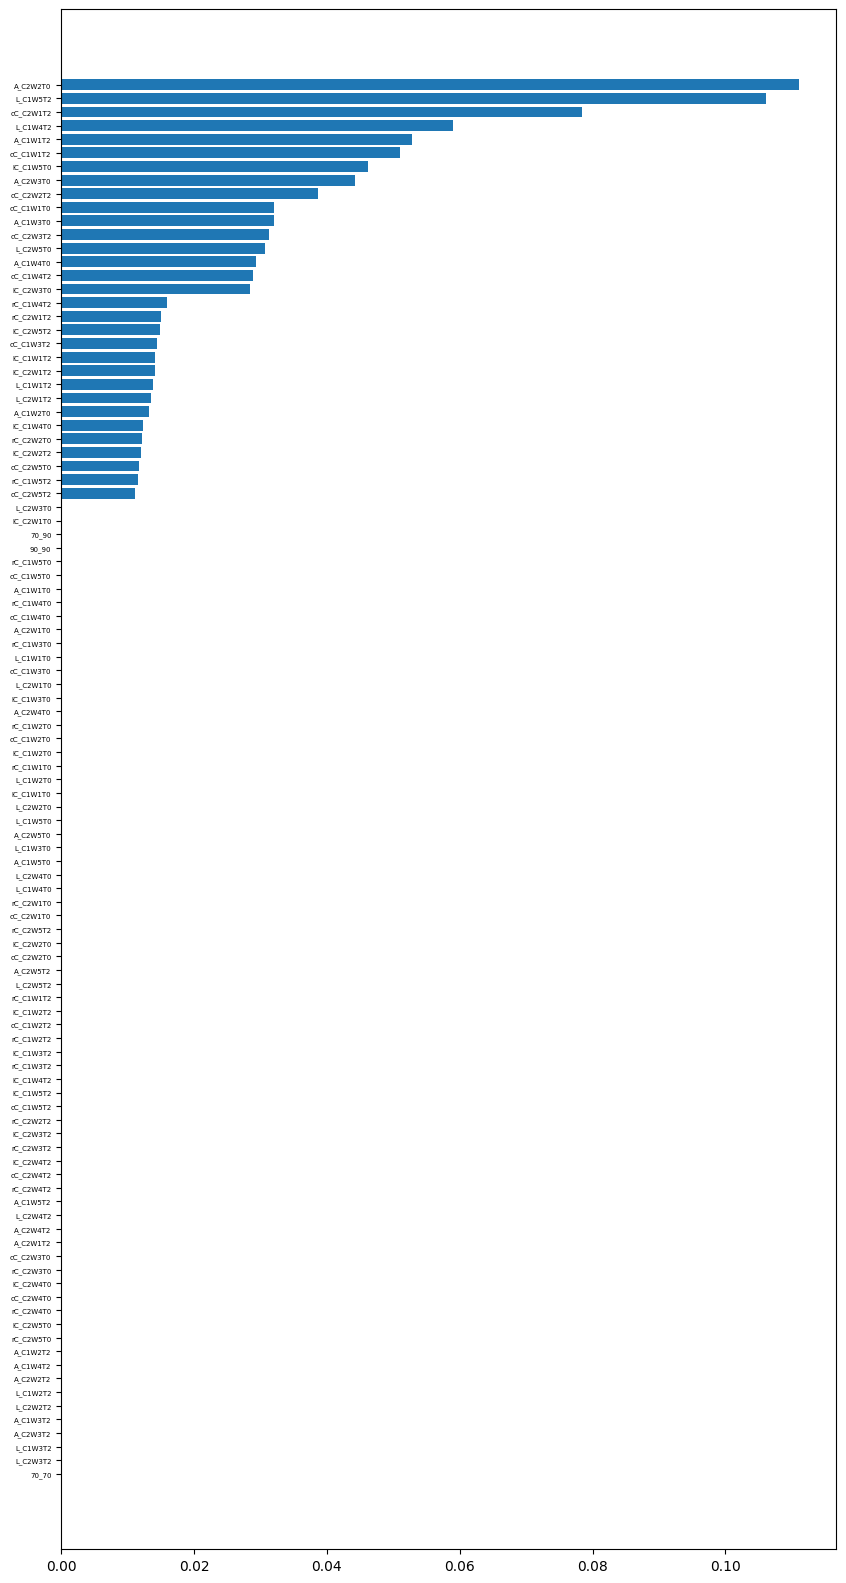

In [162]:
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators= 70)
model.fit(X_train_scramble, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_scramble)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_scramble),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_scramble.columns)[indices])

## **Adaboost for OOB(using all other variables)**

In [163]:
grid = {
    'algorithm': ["SAMME","SAMME.R"],
    'n_estimators':[10,30,50,70,100,150],
    'learning_rate':[0.5,1,1.5,2]
}
models = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=grid, cv= kfolds)
models.fit(X_train_oob, y_train)
print(models.best_params_,models.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70} 0.8427586206896553


Accuracy on train Dataset:  0.9931506849315068
f1 score on train Dataset:  0.9931550392322497
Accuracy on test Dataset:  0.9459459459459459
f1 score on test Dataset:  0.9444513638062025
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        15
           2       0.94      0.94      0.94        18

    accuracy                           0.95        37
   macro avg       0.96      0.90      0.92        37
weighted avg       0.95      0.95      0.94        37



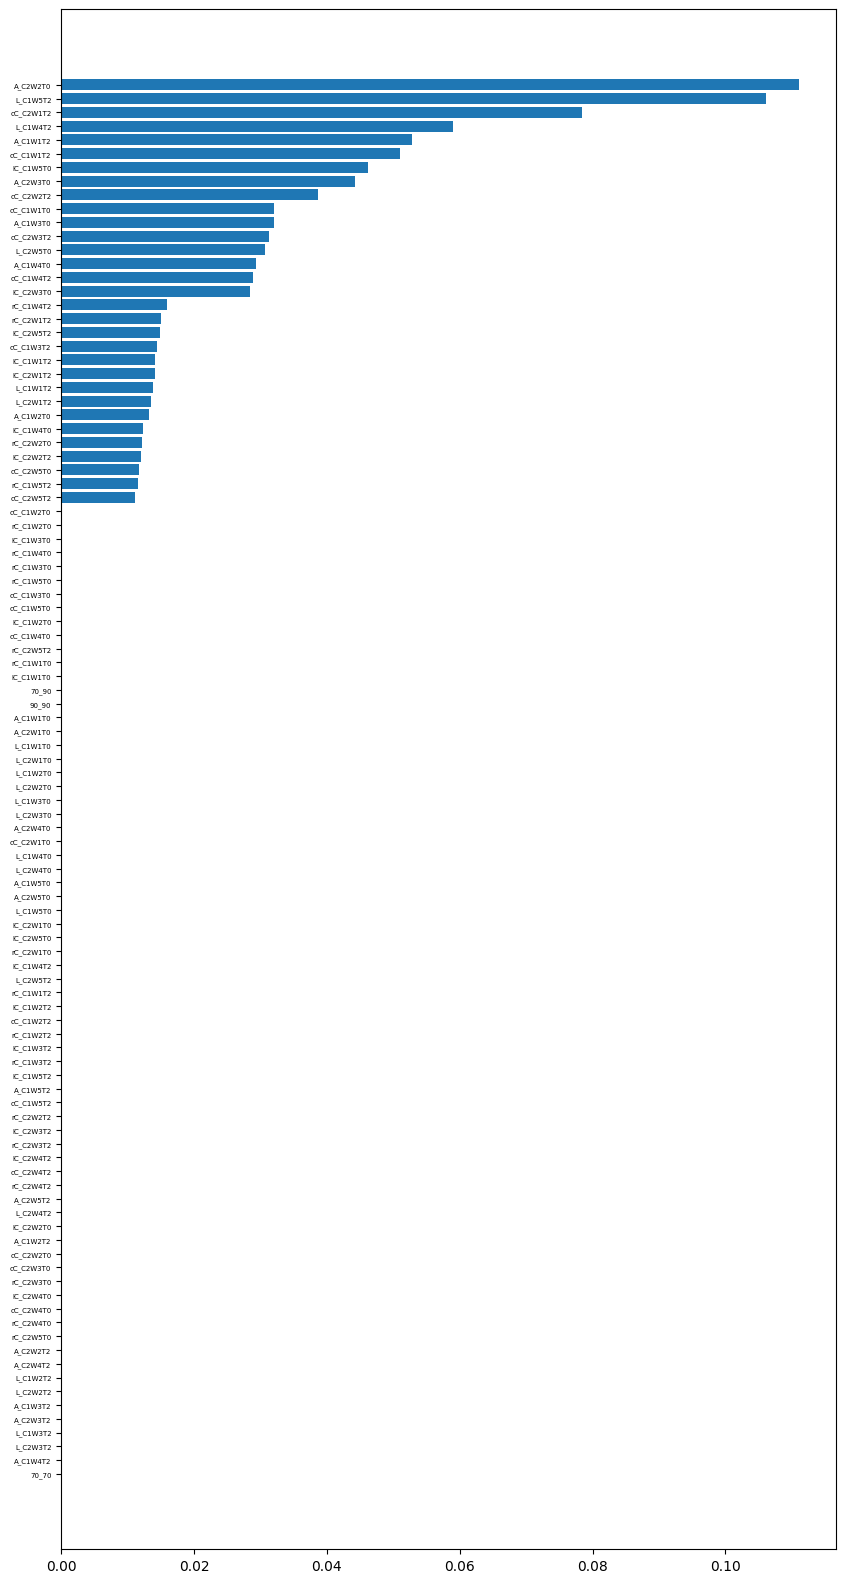

In [164]:
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators= 70)
model.fit(X_train_oob, y_train)
y_pred = model.predict(X_test_oob)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print("Accuracy on train Dataset: ",metrics.accuracy_score(y_train, model.predict(X_train_oob)))
print("f1 score on train Dataset: ",metrics.f1_score(y_train, model.predict(X_train_oob),average = 'weighted'))
print("Accuracy on test Dataset: ",accuracy)
print("f1 score on test Dataset: ",f1)
print(metrics.classification_report(y_test,y_pred))
importances = model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.tick_params(axis='y', labelsize=5)
_ = ax.set_yticklabels(np.array(X_train_oob.columns)[indices])